In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Add the scripts folder to the system path so we can import time_series.py
import sys
import os
from scipy.stats import zscore
# for a folder that contain scripts for modularity 
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src')) 
from preprocessing import NoiseHandling
from data_loader import FileLoader
from path import FilePathManager
from connection import Db_Connection
from eda import EDA
from plot import Plot

Here I connect the postgress database then I read data from the table `xdr_data` then transform it to dataframe store it on a variable df

Verify the Connection

In [2]:
# Initialize the Db_Connection class
db = Db_Connection()
df = None
try:
    # Attempt to read data from the database
    # Call the read_data method for xdr_data
    df = db.read_data("xdr_data")
    # df = db.read_data()

except Exception as e:
    # Catch any exceptions and print an error message
    print(f"Error occurred: {e}")

finally:
    # Close the database connection (even if an error occurred)
    db.close_connection()


Database connection initialized successfully!
Database connection closed.


Display Top five

In [3]:
# Print the first few rows if data is available
data_top_5 = None
if not df.empty:
    data_top_5 = df.head()
else:
    print("No data found in the table.")
data_top_5

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   
2                D42335A  ...          19725661.0          14699576.0   
3                T21824A  ...          21388122.0          15146643.0   
4                D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

In [4]:
# Create an instance of the class
file_manager = FilePathManager()

# Retrieve the file paths
file_paths = file_manager.get_file_paths()
file_name = file_manager.get_file_name()

# Initialize the loader with the file paths
loader = FileLoader(file_paths)

# Load all files
loader.load_files()

# Access individual DataFrames by file name
# df = loader.get_dataframe(file_name[0])
df_desc = loader.get_dataframe(file_name[1])

In [5]:
df_desc

Fields  \
0                                  bearer id   
1                                  Dur. (ms)   
2                                      Start   
3                                   Start ms   
4                                        End   
5                                     End ms   
6                                   Dur. (s)   
7                                       IMSI   
8                              MSISDN/Number   
9                                       IMEI   
10                        Last Location Name   
11                           Avg RTT DL (ms)   
12                           Avg RTT UL (ms)   
13                   Avg Bearer TP DL (kbps)   
14                   Avg Bearer TP UL (kbps)   
15               TCP DL Retrans. Vol (Bytes)   
16               TCP UL Retrans. Vol (Bytes)   
17                       DL TP < 50 Kbps (%)   
18            50 Kbps < DL TP < 250 Kbps (%)   
19             250 Kbps < DL TP < 1 Mbps (%)   
20                        DL TP > 1 Mbps (%)   
21                       UL TP < 10 Kbps (%)   
22             10 Kbps < UL TP < 50 Kbps (%)   
23            50 Kbps < UL TP < 300 Kbps (%)   
24                      UL TP > 300 Kbps (%)   
25                           HTTP DL (Bytes)   
26                           HTTP UL (Bytes)   
27                 Activity Duration DL (ms)   
28                 Activity Duration UL (ms)   
29                               Dur. (ms).1   
30                      Handset Manufacturer   
31                              Handset Type   
32           Nb of sec with 125000B < Vol DL   
33     Nb of sec with 1250B < Vol UL < 6250B   
34  Nb of sec with 31250B < Vol DL < 125000B   
35            Nb of sec with 37500B < Vol UL   
36    Nb of sec with 6250B < Vol DL < 31250B   
37    Nb of sec with 6250B < Vol UL < 37500B   
38             Nb of sec with Vol DL < 6250B   
39             Nb of sec with Vol UL < 1250B   
40                   Social Media DL (Bytes)   
41                   Social Media UL (Bytes)   
42                        YouTube DL (Bytes)   
43                        YouTube UL (Bytes)   
44                        Netflix DL (Bytes)   
45                        Netflix UL (Bytes)   
46                         Google DL (Bytes)   
47                         Google UL (Bytes)   
48                          Email DL (Bytes)   
49                          Email UL (Bytes)   
50                         Gaming DL (Bytes)   
51                         Gaming UL (Bytes)   
52                                  Other DL   
53                                  Other UL   
54                          Total DL (Bytes)   
55                          Total UL (Bytes)   

                                          Description  
0                              xDr session identifier  
1                   Total Duration of the xDR (in ms)  
2       Start time of the xDR (first frame timestamp)  
3   Milliseconds offset of start time for the xDR ...  
4          End time of the xDR (last frame timestamp)  
5   Milliseconds offset of end time of the xDR (la...  
6                    Total Duration of the xDR (in s)  
7            International Mobile Subscriber Identity  
8   MS International PSTN/ISDN Number of mobile - ...  
9             International Mobile Equipment Identity  
10  User location call name (2G/3G/4G) at the end ...  
11  Average Round Trip Time measurement Downlink d...  
12  Average Round Trip Time measurement Uplink dir...  
13  Average Bearer Throughput for Downlink (kbps) ...  
14  Average Bearer Throughput for uplink (kbps) - ...  
15  TCP volume of Downlink packets detected as ret...  
16  TCP volume of Uplink packets detected as retra...  
17  Duration ratio when Bearer Downlink Throughput...  
18  Duration ratio when Bearer Downlink Throughput...  
19  Duration ratio when Bearer Downlink Throughput...  
20  Duration ratio when Bearer Downlink Throughput...  
21  Duration ratio when Bearer Uplink Throughput < ….  
22  Duration 

In [4]:
# Create an instance of the EDA class
eda = EDA(df)

# Display the top 5 rows
top_n = eda.display_top_n(5)
top_n

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   
2                D42335A  ...          19725661.0          14699576.0   
3                T21824A  ...          21388122.0          15146643.0   
4                D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

In [7]:
# Display dataset info
eda.display_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [8]:
# Display statistical description
eda.display_description()

count          mean  \
Bearer Id                                 149010.0  1.013887e+19   
Start ms                                  150000.0  4.991882e+02   
End ms                                    150000.0  4.988009e+02   
Dur. (ms)                                 150000.0  1.046086e+05   
IMSI                                      149431.0  2.082016e+14   
MSISDN/Number                             148935.0  4.188282e+10   
IMEI                                      149429.0  4.847455e+13   
Avg RTT DL (ms)                           122172.0  1.097957e+02   
Avg RTT UL (ms)                           122189.0  1.766288e+01   
Avg Bearer TP DL (kbps)                   150000.0  1.330005e+04   
Avg Bearer TP UL (kbps)                   150000.0  1.770429e+03   
TCP DL Retrans. Vol (Bytes)                61855.0  2.080991e+07   
TCP UL Retrans. Vol (Bytes)                53352.0  7.596587e+05   
DL TP < 50 Kbps (%)                       149247.0  9.284475e+01   
50 Kbps < DL TP < 250 Kbps (%)            149247.0  3.069355e+00   
250 Kbps < DL TP < 1 Mbps (%)             149247.0  1.717341e+00   
DL TP > 1 Mbps (%)                        149247.0  1.609654e+00   
UL TP < 10 Kbps (%)                       149209.0  9.853014e+01   
10 Kbps < UL TP < 50 Kbps (%)             149209.0  7.767494e-01   
50 Kbps < UL TP < 300 Kbps (%)            149209.0  1.479871e-01   
UL TP > 300 Kbps (%)                      149209.0  7.892285e-02   
HTTP DL (Bytes)                            68527.0  1.144710e+08   
HTTP UL (Bytes)                            68191.0  3.242301e+06   
Activity Duration DL (ms)                 150000.0  1.829177e+06   
Activity Duration UL (ms)                 150000.0  1.408880e+06   
Dur. (ms).1                               150000.0  1.046091e+08   
Nb of sec with 125000B < Vol DL            52463.0  9.897000e+02   
Nb of sec with 1250B < Vol UL < 6250B      57107.0  3.404344e+02   
Nb of sec with 31250B < Vol DL < 125000B   56415.0  8.108374e+02   
Nb of sec with 37500B < Vol UL             19747.0  1.492571e+02   
Nb of sec with 6250B < Vol DL < 31250B     61684.0  9.654648e+02   
Nb of sec with 6250B < Vol UL < 37500B     38158.0  1.413048e+02   
Nb of sec with Vol DL < 6250B             149246.0  3.719788e+03   
Nb of sec with Vol UL < 1250B             149208.0  4.022083e+03   
Social Media DL (Bytes)                   150001.0  1.795322e+06   
Social Media UL (Bytes)                   150001.0  3.292843e+04   
Google DL (Bytes)                         150001.0  5.750753e+06   
Google UL (Bytes)                         150001.0  2.056542e+06   
Email DL (Bytes)                          150001.0  1.791729e+06   
Email UL (Bytes)                          150001.0  4.673734e+05   
Youtube DL (Bytes)                        150001.0  1.163407e+07   
Youtube UL (Bytes)                        150001.0  1.100941e+07   
Netflix DL (Bytes)                        150001.0  1.162685e+07   
Netflix UL (Bytes)                        150001.0  1.100175e+07   
Gaming DL (Bytes)                         150001.0  4.220447e+08   
Gaming UL (Bytes)                         150001.0  8.288398e+06   
Other DL (Bytes)                          150001.0  4.211005e+08   
Other UL (Bytes)                          150001.0  8.264799e+06   
Total UL (Bytes)                          150000.0  4.112121e+07   
Total DL (Bytes)                          150000.0  4.546434e+08   

                                                   std           min  \
Bearer Id                                 2.893173e+18  6.917538e+18   
Start ms                                  2.886118e+02  0.000000e+00   
End ms                                    2.880977e+02  0.000000e+00   
Dur. (ms)                                 8.103762e+04  7.142000e+03   
IMSI                                      2.148809e+10  2.040471e+14   
MSISDN/Number                             2.447443e+12  3.360100e+10   
IMEI                                      2.241637e+13  4.400152e+11   


In [9]:
# Check for null values
eda.check_null_values()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

### Here is the code that checks columns that have very small missing values 

In [5]:
# Use the first method with custom min and max values
columns_with_few_nulls, rows_with_missing_values = NoiseHandling.check_missed_greater_than_3(df, min_value=0, max_value=2)
print("Columns with few nulls:", columns_with_few_nulls)
rows_with_missing_values

Total Number of columns that have missing value > 0 and < 2 is equal to: 12
Columns with few nulls: ['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)']


Bearer Id Start  Start ms   End  End ms  Dur. (ms)  IMSI  \
150000        NaN  None       NaN  None     NaN        NaN   NaN   

        MSISDN/Number  IMEI Last Location Name  ...  Youtube DL (Bytes)  \
150000            NaN   NaN               None  ...        1.163407e+07   

        Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
150000        1.100941e+07        1.162685e+07        1.100175e+07   

        Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
150000       4.220447e+08       8.288398e+06      4.211005e+08   

        Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
150000      8.264799e+06               NaN               NaN  

[1 rows x 55 columns]

#### When I observe it must of the records are miss so inputing these value has no siginificance so I will drop those rows 

In [6]:
# Use the second method to drop rows with missing values in a specific column
df = NoiseHandling.handling_cols_with_missed_values_less_than_3(df, column_names=columns_with_few_nulls)

Dropping rows with missing values in columns: ['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)']


#### To Verify it

In [7]:
df.isna().sum()

Bearer Id                                      990
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                           569
MSISDN/Number                                 1065
IMEI                                           571
Last Location Name                            1152
Avg RTT DL (ms)                              27828
Avg RTT UL (ms)                              27811
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  88145
TCP UL Retrans. Vol (Bytes)                  96648
DL TP < 50 Kbps (%)                            753
50 Kbps < DL TP < 250 Kbps (%)                 753
250 Kbps < DL TP < 1 Mbps (%)                  753
DL TP > 1 Mbps (%)             

#### Now also when I observe Null value the first column which is uniquly identifies the records that I couldn't replace with any value, so I deciede to drop that column missing value rows too

In [7]:
# Use the second method to drop rows with missing values in a specific column
df = NoiseHandling.handling_cols_with_missed_values_less_than_3(df, column_names=['Bearer Id'])

Dropping rows with missing values in columns: ['Bearer Id']


In [8]:
null_columns_greater_than_2 =  df.columns[(df.isnull().sum() > 0)]
print(f"I have {len(null_columns_greater_than_2)} columns that Have missing value greater than 2")

I have 28 columns that Have missing value greater than 2


In [9]:
df[null_columns_greater_than_2].isna().sum()

IMSI                                             9
MSISDN/Number                                  504
IMEI                                            11
Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Handset Manufacturer                            11
Handset Type                   

In [11]:
# Find rows where null values exist in the specified columns and in the 'x_column'
filtered_rows = df[df[null_columns_greater_than_2].isnull().any(axis=1) & df['IMSI'].isnull()]
filtered_rows2 = df[df[null_columns_greater_than_2].isnull().any(axis=1) & df['IMEI'].isnull()]
# Display the filtered rows
filtered_rows2


Bearer Id            Start  Start ms              End  End ms  \
21844   6.917538e+18  4/24/2019 20:26     736.0   4/25/2019 0:14     1.0   
24430   6.917538e+18  4/24/2019 20:58     125.0  4/24/2019 23:35   994.0   
24818   1.268214e+19  4/24/2019 21:02     478.0   4/25/2019 2:55   997.0   
58267   6.917538e+18  4/25/2019 23:05     714.0  4/26/2019 23:11    12.0   
79910   6.917538e+18   4/27/2019 7:44     593.0  4/27/2019 23:11   529.0   
89914   6.917538e+18  4/27/2019 14:12     749.0   4/28/2019 4:59   548.0   
91263   6.917538e+18  4/27/2019 14:45      42.0   4/28/2019 3:25   936.0   
116592  1.268214e+19   4/28/2019 1:34      98.0   4/29/2019 1:27   862.0   
140137  6.917538e+18   4/29/2019 3:21     626.0   4/30/2019 2:56   432.0   
141196  6.917538e+18   4/29/2019 3:56     245.0   4/30/2019 1:25   329.0   
145353  1.268214e+19   4/29/2019 6:06     463.0   4/30/2019 6:06   466.0   

        Dur. (ms)          IMSI  MSISDN/Number  IMEI Last Location Name  ...  \
21844     13666.0           NaN            NaN   NaN            U14936A  ...   
24430      9460.0           NaN            NaN   NaN            G56560A  ...   
24818     21231.0           NaN            NaN   NaN            G15451C  ...   
58267     86782.0  2.082095e+14            NaN   NaN            U74261B  ...   
79910     55575.0  2.082095e+14            NaN   NaN            W21110C  ...   
89914     53166.0           NaN            NaN   NaN            G83959A  ...   
91263     45594.0           NaN            NaN   NaN            U85956A  ...   
116592    85999.0           NaN            NaN   NaN            V70710B  ...   
140137    84922.0           NaN            NaN   NaN            U73516A  ...   
141196    77313.0           NaN            NaN   NaN            U42171B  ...   
145353    86371.0           NaN            NaN   NaN            V77597B  ...   

        Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
21844           20747429.0          21022153.0           5246185.0   
24430            1712095.0           4735960.0           1849343.0   
24818            8077188.0          14218592.0           6581163.0   
58267            1215176.0           6041132.0           1418313.0   
79910           17202372.0          21288822.0          19270040.0   
89914           19555096.0          18356401.0          22998366.0   
91263           16915430.0          12855726.0          14508191.0   
116592            647961.0          13367183.0          13169294.0   
140137           4515779.0          10260059.0          11863799.0   
141196          19094432.0          17771961.0          20495181.0   
145353           8002890.0          13686058.0          15839616.0   

        Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
21844           17407945.0        812195002.0         13334794.0   
24430           13887683.0         54277434.0           694630.0   
24818            9334994.0        592935106.0          8662570.0   
58267            5665048.0        596717529.0          8854054.0   
79910            3265093.0         62871774.0         11659446.0   
89914            5954544.0        789043081.0          2146033.0   
91263           19752864.0        501514849.0          1942936.0   
116592          21395712.0        747309023.0         11095360.0   
140137           3643319.0         38470041.0         12809993.0   
141196           9063347.0        282473281.0          9427574.0   
145353          12320580.0        587372924.0          5915899.0   

        Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
21844        462764262.0         5997128.0        60679021.0       844371851.0  
24430        779382238.0         7240687.0        28222264.0        72444302.0  
24818         31148323.0        14575026.0        50670513.0       614648963.0  
58267        642690544.0        11469281.0        34369618.0       611874376.0  
79910        618554992.0        15807139.0        55218094.0       1067516

After I observe the result of IMSI, MSISDN, and IMEI missed rows since these are critical for my analysis and even there's no feasible way to impute the missing values reliably, I can follow a method like forward or backward fill or mode mechanism 
while the records those have missed value after remoming unreplacable rows it is not a significance number it is arround 9. As well when observe it I got three column values are missed so what I decied is removing rows with missing values the best option for this case too.

In [10]:
# Drop rows where all specified columns are NaN
columns_to_check = ['IMSI', 'IMEI', 'MSISDN/Number']
df = NoiseHandling.common_missed_of_subscribers(df, column_names=columns_to_check)

Dropping rows where all of the following columns are missing: ['IMSI', 'IMEI', 'MSISDN/Number']


In [12]:
# Use the method to get columns with null values and their counts
missing_counts = NoiseHandling.null_columns_greater_than_0(df)
print("Missing values per column:\n", missing_counts)

(27,)
Missing values per column:
 MSISDN/Number                                  495
IMEI                                             2
Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Handset Manufacturer                             2
Handset Type                                    

In [13]:
# Find rows where IMSI has the same value as another row (including the first occurrence)
duplicate_rows = df[df['IMSI'].duplicated(keep=False)]

# Sort the duplicate rows in descending order (based on IMSI or another column)
duplicate_rows_sorted = duplicate_rows.sort_values(by='IMSI', ascending=False)
duplicate_rows_sorted.head(10)

Bearer Id           Start  Start ms              End  End ms  \
928     1.304243e+19  4/24/2019 0:36     507.0   4/25/2019 0:36   507.0   
100012  1.311448e+19  4/9/2019 14:57     414.0   4/29/2019 1:34   128.0   
100013  1.311448e+19  4/10/2019 3:25     731.0   4/29/2019 1:35   828.0   
35084   1.304243e+19  4/25/2019 0:37     736.0   4/26/2019 0:37   673.0   
73962   1.304243e+19  4/26/2019 8:59     104.0   4/27/2019 9:03   937.0   
126130  1.311448e+19  4/27/2019 6:34     876.0   4/30/2019 9:03   491.0   
125496  1.311448e+19  4/26/2019 8:27     725.0   4/30/2019 9:03   491.0   
47432   1.304243e+19  4/25/2019 7:26     524.0   4/26/2019 7:26   487.0   
47434   1.311448e+19  4/25/2019 7:26     740.0   4/26/2019 9:02   392.0   
74818   1.311448e+19  4/26/2019 9:08     610.0  4/27/2019 17:34   445.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
928       86400.0  2.082099e+14   3.376355e+10  3.534681e+13   
100012  1679813.0  2.082099e+14   3.376355e+10  3.534681e+13   
100013  1634983.0  2.082099e+14   3.376355e+10  3.534681e+13   
35084     86399.0  2.082099e+14   3.376355e+10  3.534681e+13   
73962     86663.0  2.082099e+14   3.376028e+10  3.561421e+13   
126130   268168.0  2.082099e+14   3.376028e+10  3.561421e+13   
125496   347776.0  2.082099e+14   3.376028e+10  3.561421e+13   
47432     86399.0  2.082099e+14   3.365079e+10  8.601480e+13   
47434     92194.0  2.082099e+14   3.365079e+10  8.601480e+13   
74818    116747.0  2.082099e+14   3.365079e+10  8.601480e+13   

       Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
928               T73670B  ...          14171064.0          17969140.0   
100012            T73670B  ...           7725935.0           6547902.0   
100013            T73670B  ...          14174006.0           9543474.0   
35084             T73670B  ...           2608005.0          21288360.0   
73962             L74520B  ...           2201704.0          20237521.0   
126130            L74520B  ...          19475763.0           3528408.0   
125496            D74520B  ...          22419655.0          17706491.0   
47432             D53511B  ...          20916267.0           2629566.0   
47434             L53511B  ...          11970181.0          18580955.0   
74818             T11002B  ...           9955581.0          20590753.0   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
928             17587261.0          13848108.0        627968339.0   
100012          15286906.0           4138800.0        576169362.0   
100013          11965711.0           5578206.0        324097722.0   
35084            3635842.0          21626694.0        405336480.0   
73962            6923567.0          13389347.0        320292878.0   
126130           5634954.0          18093545.0        606097758.0   
125496           2609118.0          16525840.0        137927491.0   
47432            7121992.0           2655156.0        128060029.0   
47434            3208365.0           1652746.0        454323036.0   
74818             507077.0          14615308.0        149996706.0   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
928            15091927.0       541463155.0        13456536.0   
100012          4962473.0       465550776.0         9629071.0   
100013           175327.0       208645371.0        12252382.0   
35084           9423438.0       473194680.0         6111494.0   
73962           9122478.0       607034935.0         5053533.0   
126130          6292260.0       275430829.0        11456898.0   
125496         13113177.0         7318020.0         6129257.0   
47432          12311376.0       797628131.0         5095590.0   
47434          13543988.0       819566172.0        11085838.0   
74818           8658828.0       404325160.0         7309876.0   

        Total UL (Bytes)  Total DL (Bytes)  
928           61707527.0       667549401.0  
100012        29396179.0       616799784.0  
100013        31723203.0       356910231.0  
35084    

From the above figure to replace missing values in the `MSISDN/Number` and `IMEI` columns, I use the `groupby('IMSI')` method followed by `transform(lambda x: x.fillna(method='pad'))`. This fills the `NaN` values within each group of the same `IMSI` with the previous available value from the same group. I observe that if there is a certain value of `IMSI` (x) and corresponding `MSISDN/Number` (z) and `IMEI` (w), then when the same `IMSI` value (x) appears again, the values for `MSISDN/Number` and `IMEI` are mostly `z` and `w` respectively. Instead of using `ffill`, `bfill`, or any statistical mechanism, it is better to use this method as it ensures missing values are replaced with data from the same group, preserving the integrity and consistency of the data. This approach is applied if it satisfied the condition 

In [14]:
# Call the method to fill the null values in 'MSISDN/Number' and 'IMEI'
df = NoiseHandling.fill_nulls_by_imsi_group(df)

Filling missing 'MSISDN/Number' and 'IMEI' by IMSI group...


c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_2\scripts\preprocessing.py:91: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MSISDN/Number'] = df.groupby('IMSI')['MSISDN/Number'].transform(lambda x: x.fillna(method='pad'))
c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_2\scripts\preprocessing.py:94: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['IMEI'] = df.groupby('IMSI')['IMEI'].transform(lambda x: x.fillna(method='pad'))


In [16]:
null_columns_greater_than_0 =  df.columns[(df.isnull().sum() > 0)]
df[null_columns_greater_than_0].isna().sum()

MSISDN/Number                                  478
IMEI                                             2
Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87906
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Handset Manufacturer                             2
Handset Type                                     2
Nb of sec with 125000B < Vol DL

Base on this I replace `17` reords of `MSISDN/Number`

The `IMEI` (International Mobile Equipment Identity) is typically a unique identifier for devices, and if it's missing, it may imply that the device information is incomplete or unreliable. Since `IMEI` is unique to each device, imputing a missing `IMEI` could introduce significant errors. The best approach here is to `drop` the rows where `IMEI` is missing

In [15]:
df.dropna(subset=['IMEI'], inplace=True)

Filled with `Mode` value of `MSISDN/Number`

In [16]:
# Fill missing 'MSISDN/Number' with the most frequent value globally
mode_value = df['MSISDN/Number'].mode()[0]  # Get the most frequent value
df['MSISDN/Number'].fillna(mode_value, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11224\3501947776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MSISDN/Number'].fillna(mode_value, inplace=True)


In [19]:
null_columns_greater_than_0 =  df.columns[(df.isnull().sum() > 0)]
df[null_columns_greater_than_0].isna().sum()

Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87905
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Nb of sec with 125000B < Vol DL              96996
Nb of sec with 1250B < Vol UL < 6250B        92445
Nb of sec with 31250B < Vol DL < 125000B     93158
Nb of sec with 37500B < Vol UL              129365
Nb of sec with 6250B < Vol DL <

In [22]:
df[null_columns_greater_than_0].describe().T

count          mean  \
Avg RTT DL (ms)                           121314.0  1.060919e+02   
Avg RTT UL (ms)                           121333.0  1.766435e+01   
TCP DL Retrans. Vol (Bytes)                61094.0  2.094797e+07   
TCP UL Retrans. Vol (Bytes)                52631.0  7.688356e+05   
DL TP < 50 Kbps (%)                       148283.0  9.285634e+01   
50 Kbps < DL TP < 250 Kbps (%)            148283.0  3.059022e+00   
250 Kbps < DL TP < 1 Mbps (%)             148283.0  1.716346e+00   
DL TP > 1 Mbps (%)                        148283.0  1.612275e+00   
UL TP < 10 Kbps (%)                       148229.0  9.853084e+01   
10 Kbps < UL TP < 50 Kbps (%)             148229.0  7.768183e-01   
50 Kbps < UL TP < 300 Kbps (%)            148229.0  1.483920e-01   
UL TP > 300 Kbps (%)                      148229.0  7.904661e-02   
HTTP DL (Bytes)                            67771.0  1.155946e+08   
HTTP UL (Bytes)                            67421.0  3.272831e+06   
Nb of sec with 125000B < Vol DL            52003.0  9.954935e+02   
Nb of sec with 1250B < Vol UL < 6250B      56554.0  3.427931e+02   
Nb of sec with 31250B < Vol DL < 125000B   55841.0  8.170719e+02   
Nb of sec with 37500B < Vol UL             19634.0  1.498669e+02   
Nb of sec with 6250B < Vol DL < 31250B     61015.0  9.726742e+02   
Nb of sec with 6250B < Vol UL < 37500B     37872.0  1.421599e+02   
Nb of sec with Vol DL < 6250B             148282.0  3.729570e+03   
Nb of sec with Vol UL < 1250B             148228.0  4.031443e+03   

                                                   std   min       25%  \
Avg RTT DL (ms)                           5.860876e+02   0.0      32.0   
Avg RTT UL (ms)                           8.487524e+01   0.0       2.0   
TCP DL Retrans. Vol (Bytes)               1.828756e+08   2.0   35654.0   
TCP UL Retrans. Vol (Bytes)               2.663348e+07   1.0    4647.5   
DL TP < 50 Kbps (%)                       1.304006e+01   0.0      91.0   
50 Kbps < DL TP < 250 Kbps (%)            6.207279e+00   0.0       0.0   
250 Kbps < DL TP < 1 Mbps (%)             4.162173e+00   0.0       0.0   
DL TP > 1 Mbps (%)                        4.832124e+00   0.0       0.0   
UL TP < 10 Kbps (%)                       4.641498e+00   0.0      99.0   
10 Kbps < UL TP < 50 Kbps (%)             3.228733e+00   0.0       0.0   
50 Kbps < UL TP < 300 Kbps (%)            1.629108e+00   0.0       0.0   
UL TP > 300 Kbps (%)                      1.298254e+00   0.0       0.0   
HTTP DL (Bytes)                           9.684452e+08  40.0  114522.0   
HTTP UL (Bytes)                           1.967855e+07  40.0   24676.0   
Nb of sec with 125000B < Vol DL           2.549468e+03   1.0      20.0   
Nb of sec with 1250B < Vol UL < 6250B     1.451634e+03   1.0      10.0   
Nb of sec with 31250B < Vol DL < 125000B  1.849340e+03   1.0      26.0   
Nb of sec with 37500B < Vol UL            1.222540e+03   1.0       2.0   
Nb of sec with 6250B < Vol DL < 31250B    1.954798e+03   1.0      39.0   
Nb of sec with 6250B < Vol UL < 37500B    9.970075e+02   1.0       3.0   
Nb of sec with Vol DL < 6250B             9.194123e+03   1.0      87.0   
Nb of sec with Vol UL < 1250B             1.018383e+04   1.0     106.0   

                                                50%          75%           max  
Avg RTT DL (ms)                                45.0        69.00  9.692300e+04  
Avg RTT UL (ms)                                 5.0        15.00  7.120000e+03  
TCP DL Retrans. Vol (Bytes)                574681.0   3792938.25  4.294426e+09  
TCP UL Retrans. Vol (Bytes)                 20996.0     84403.00  2.908226e+09  
DL TP < 50 Kbps (%)                           100.0       100.00  1.000000e+02  
50 Kbps < DL TP < 250 Kbps (%)                  0.0         4.00  9.300000e+01  
250 Kbps < DL TP < 1 Mbps (%)                   0.0         1.00  1.000000e+02  
DL TP > 1 Mbps (%)                              0.0         0.00  9.400000e+01  
UL TP < 10 Kbps (%)                           10

In [24]:
# Identify columns with missing values
null_columns_greater_than_0 = df.columns[df.isnull().any()]

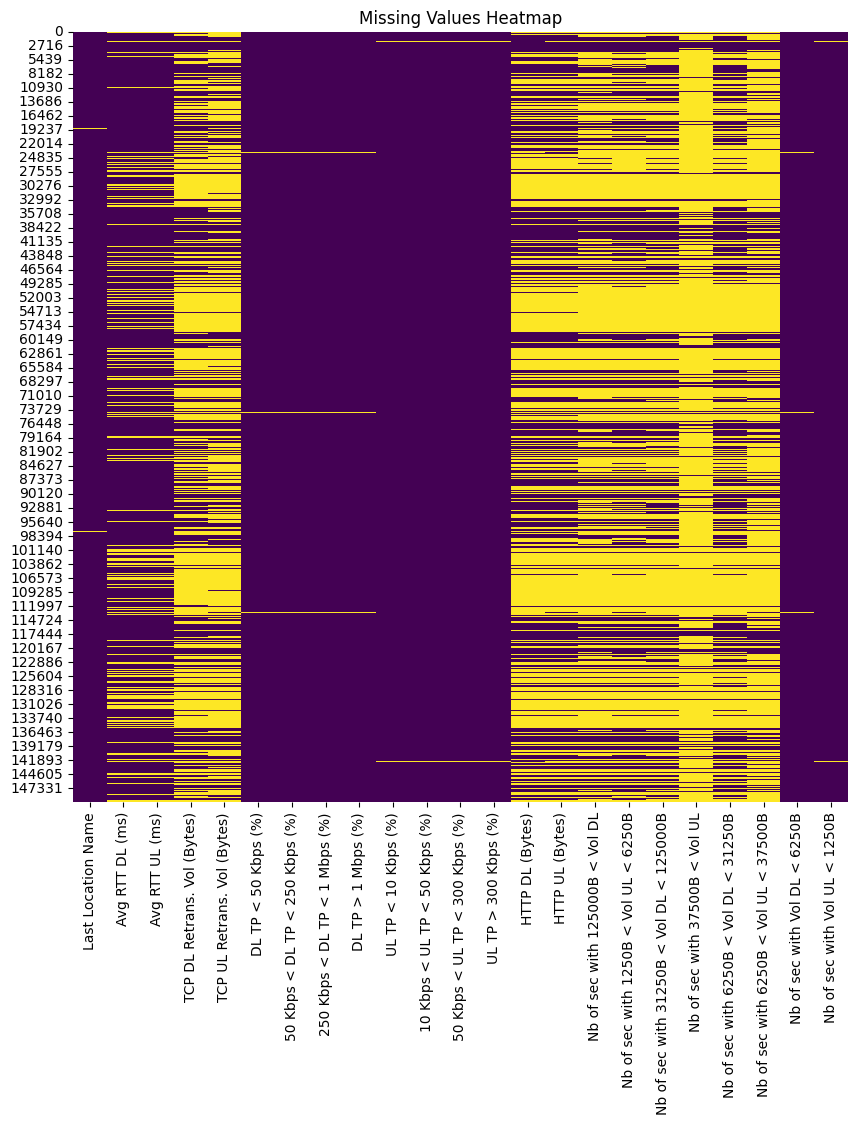

In [25]:
# Plot missing values as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df[null_columns_greater_than_0].isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

#### Attributes of Missed value with There distribution

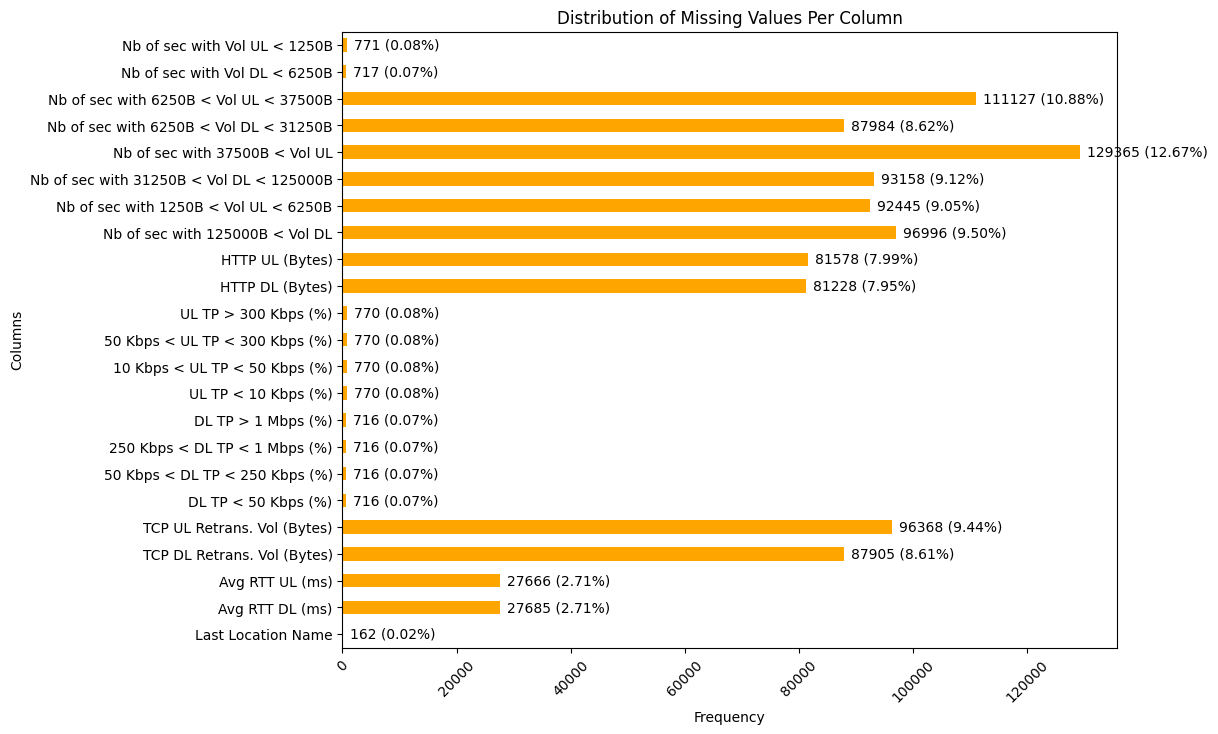

In [21]:
# Initialize the Plot class
plot_instance = Plot(df)
# Call the method to plot the distribution of missing values
plot_instance.distribution_of_missing_values(null_columns_greater_than_0)

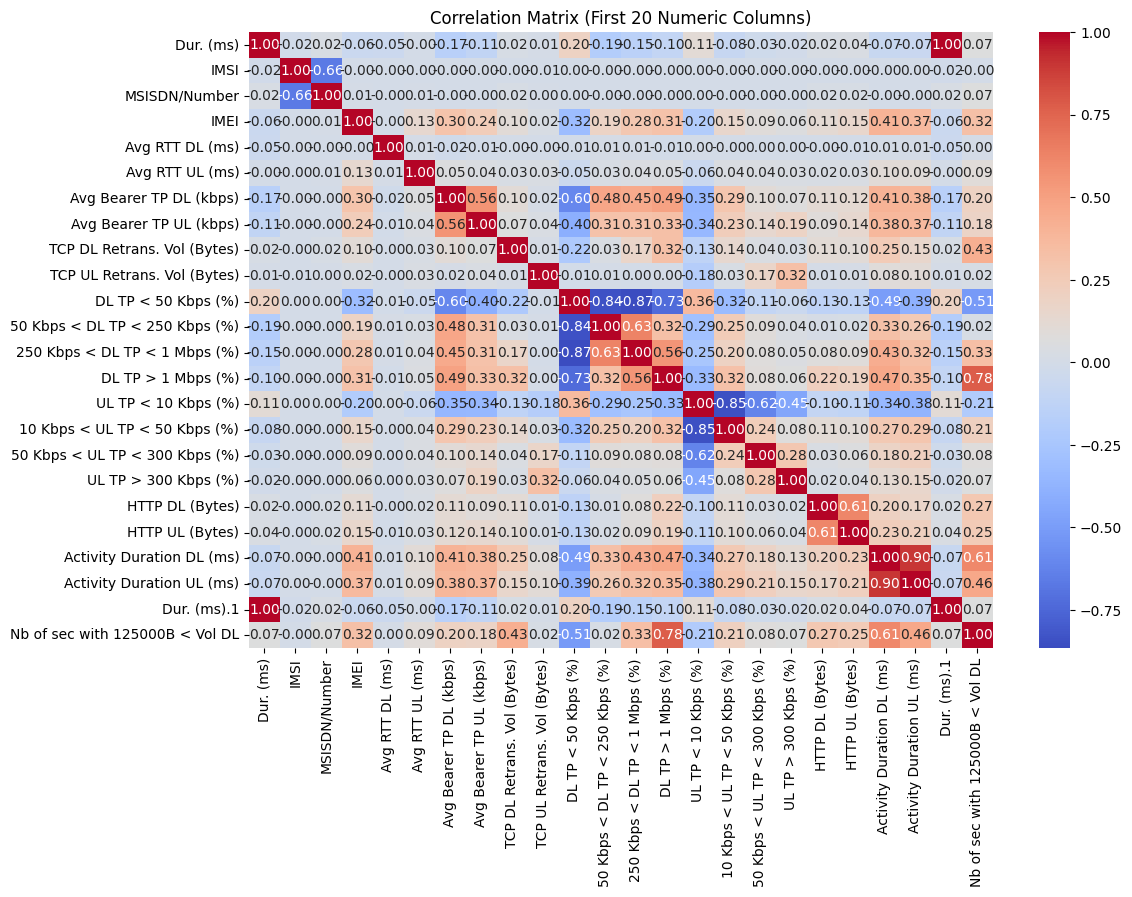

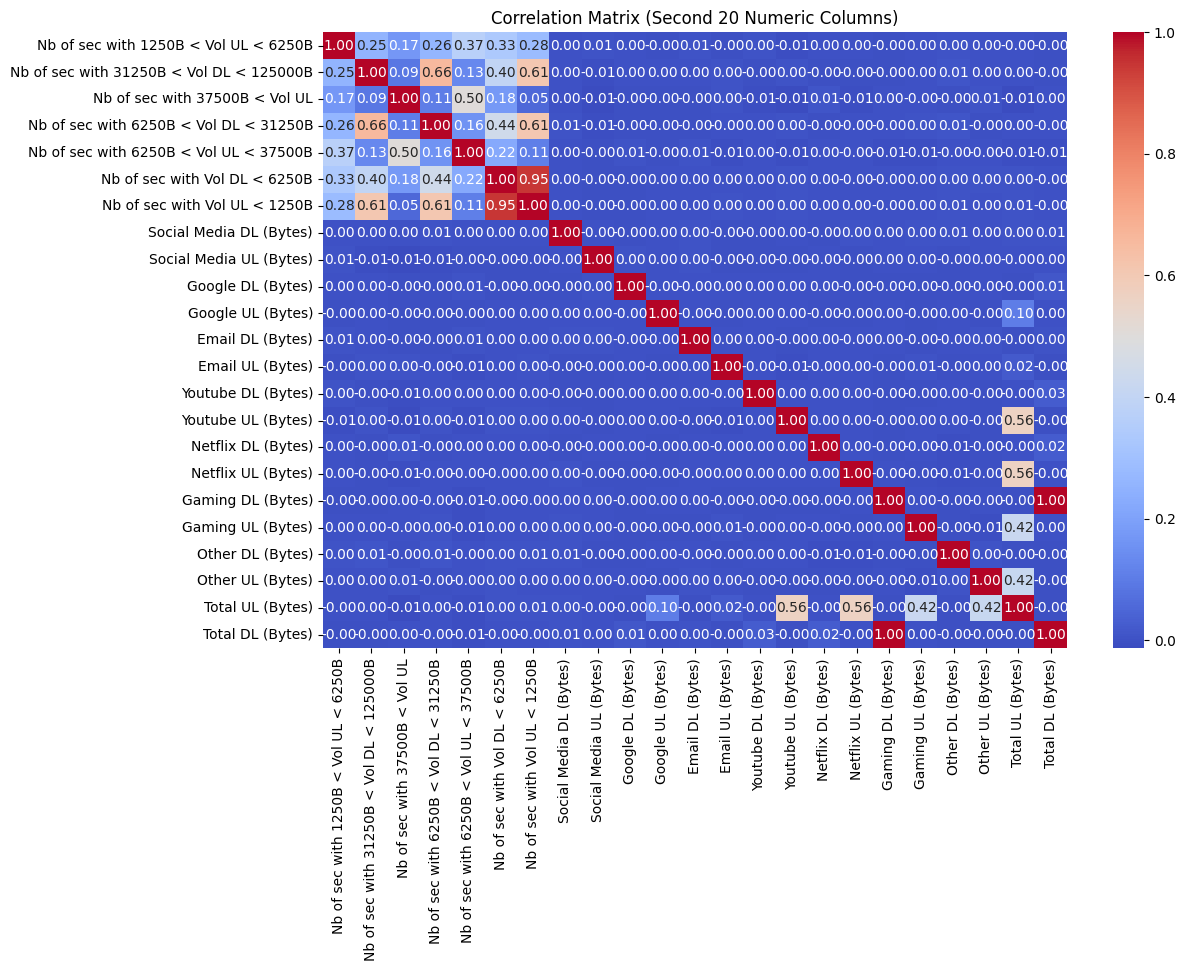

In [31]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Check if there are at least 20 columns
num_columns = len(numeric_data.columns)
if num_columns < 20:
    print("The dataset has fewer than 20 numeric columns.")
else:
    # First 20 numeric columns
    first_20 = numeric_data.iloc[:, 3:27]
    first_20_corr = first_20.corr()
    
    # Visualize the correlation matrix for the first 20 columns
    plt.figure(figsize=(12, 8))
    sns.heatmap(first_20_corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Matrix (First 20 Numeric Columns)")
    plt.show()

    if num_columns > 27:
        # Second 20 numeric columns
        second_20 = numeric_data.iloc[:, 27:55]  # Adjust slice if fewer than 40 columns
        second_20_corr = second_20.corr()
        
        # Visualize the correlation matrix for the second 20 columns
        plt.figure(figsize=(12, 8))
        sns.heatmap(second_20_corr, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Correlation Matrix (Second 20 Numeric Columns)")
        plt.show()
    else:
        print("The dataset has fewer than 40 numeric columns.")

In [25]:
df[null_columns_greater_than_0].isna().sum()

Last Location Name                             162
Avg RTT DL (ms)                              27685
Avg RTT UL (ms)                              27666
TCP DL Retrans. Vol (Bytes)                  87905
TCP UL Retrans. Vol (Bytes)                  96368
DL TP < 50 Kbps (%)                            716
50 Kbps < DL TP < 250 Kbps (%)                 716
250 Kbps < DL TP < 1 Mbps (%)                  716
DL TP > 1 Mbps (%)                             716
UL TP < 10 Kbps (%)                            770
10 Kbps < UL TP < 50 Kbps (%)                  770
50 Kbps < UL TP < 300 Kbps (%)                 770
UL TP > 300 Kbps (%)                           770
HTTP DL (Bytes)                              81228
HTTP UL (Bytes)                              81578
Nb of sec with 125000B < Vol DL              96996
Nb of sec with 1250B < Vol UL < 6250B        92445
Nb of sec with 31250B < Vol DL < 125000B     93158
Nb of sec with 37500B < Vol UL              129365
Nb of sec with 6250B < Vol DL <

Skewness for first group of columns:
Dur. (ms)                        3.952609
IMSI                            41.045956
MSISDN/Number                  332.155856
IMEI                             1.071470
Avg RTT DL (ms)                 62.907828
Avg RTT UL (ms)                 28.457415
Avg Bearer TP DL (kbps)          2.589437
Avg Bearer TP UL (kbps)          4.503413
TCP DL Retrans. Vol (Bytes)     15.951809
dtype: float64


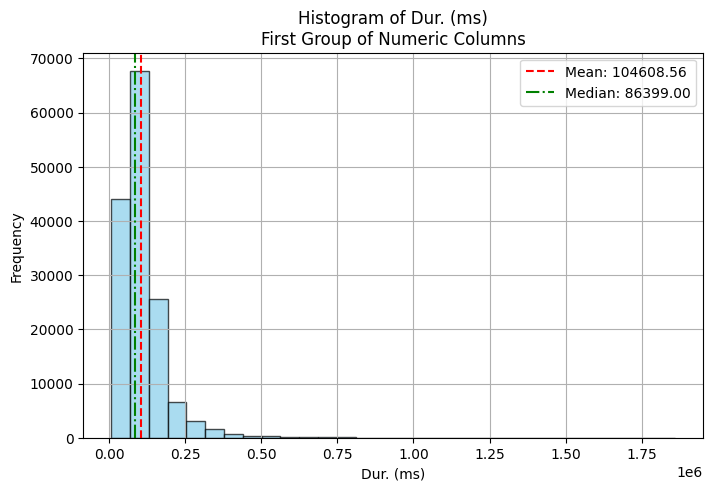

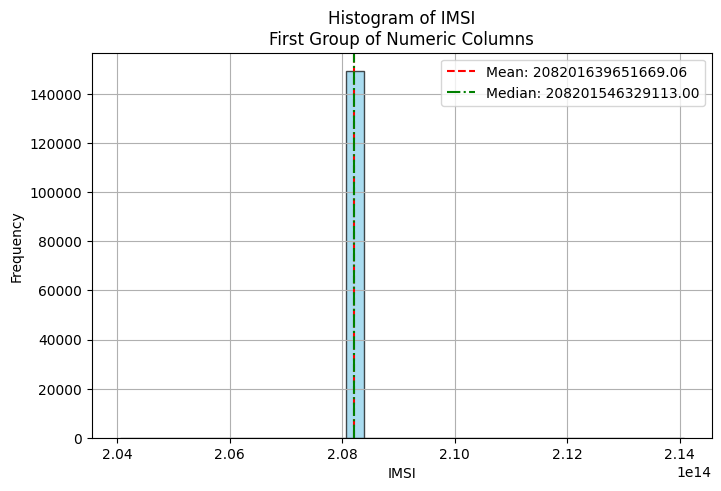

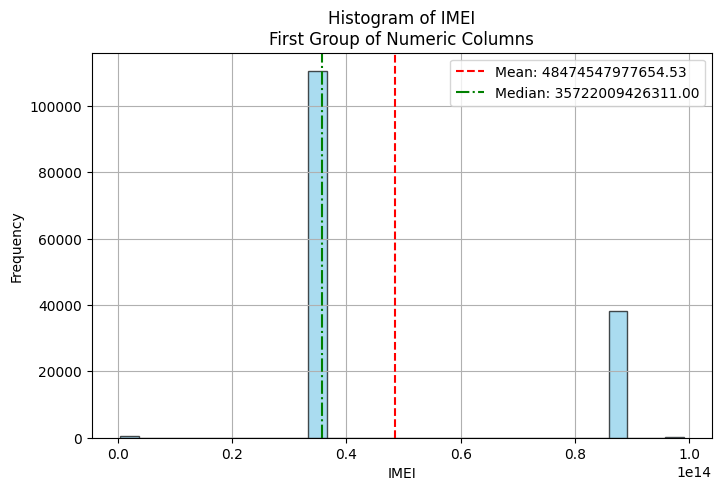

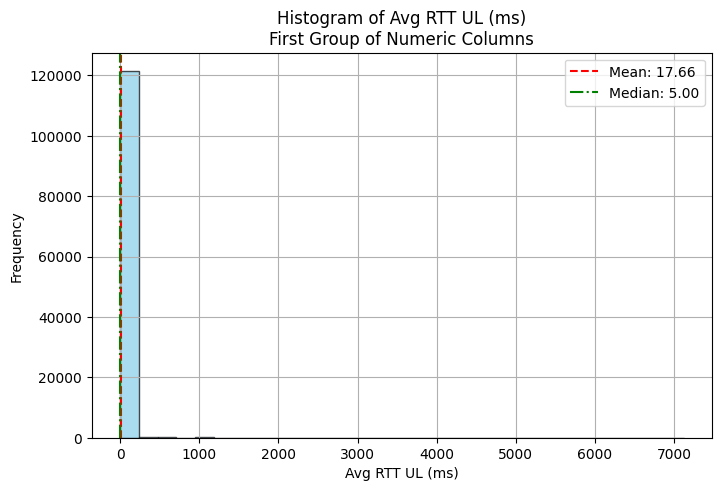

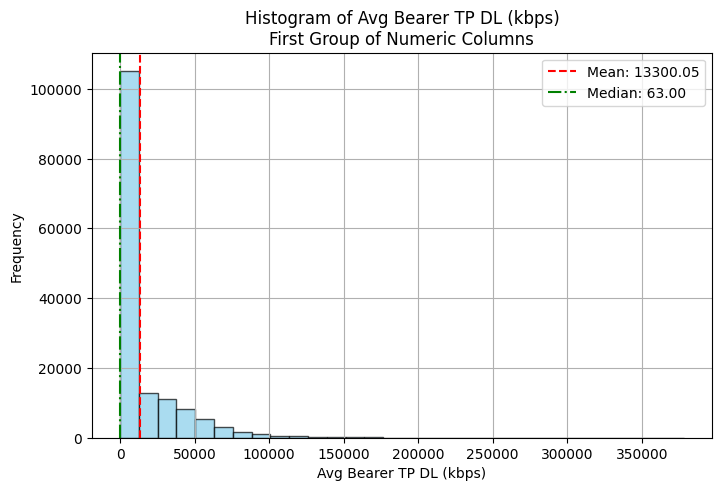

Skewness for second group of columns:
TCP UL Retrans. Vol (Bytes)       84.113393
DL TP < 50 Kbps (%)               -2.297803
50 Kbps < DL TP < 250 Kbps (%)     3.271453
250 Kbps < DL TP < 1 Mbps (%)      4.566158
DL TP > 1 Mbps (%)                 5.370351
UL TP < 10 Kbps (%)               -8.985016
10 Kbps < UL TP < 50 Kbps (%)     10.943888
50 Kbps < UL TP < 300 Kbps (%)    21.878495
UL TP > 300 Kbps (%)              36.174053
HTTP DL (Bytes)                   38.944710
HTTP UL (Bytes)                   32.474970
Activity Duration DL (ms)          5.872256
dtype: float64


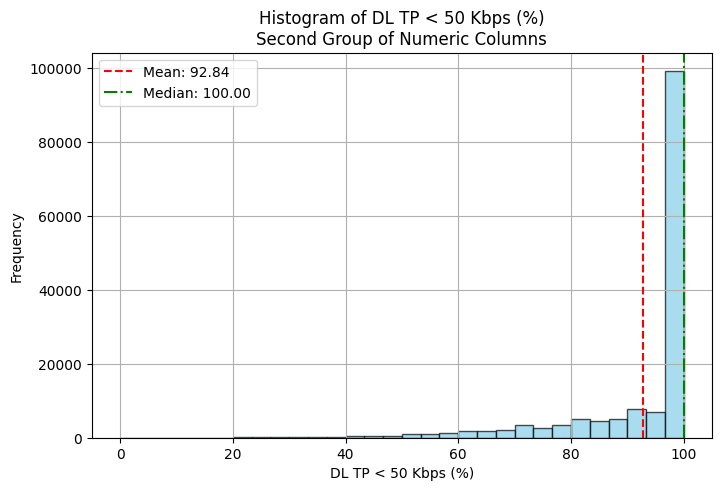

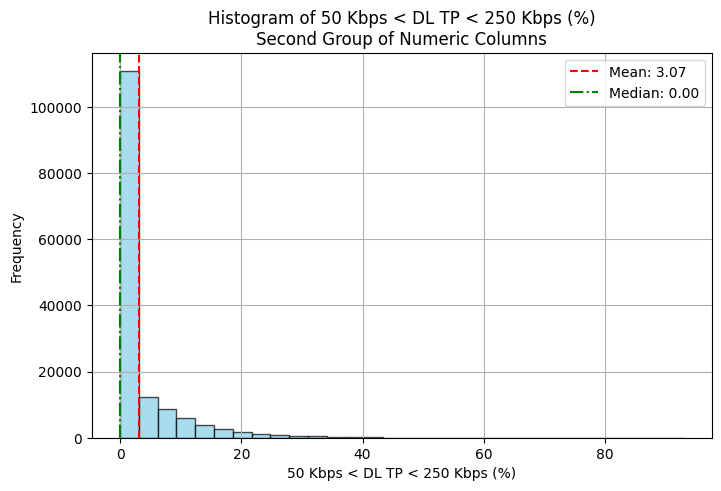

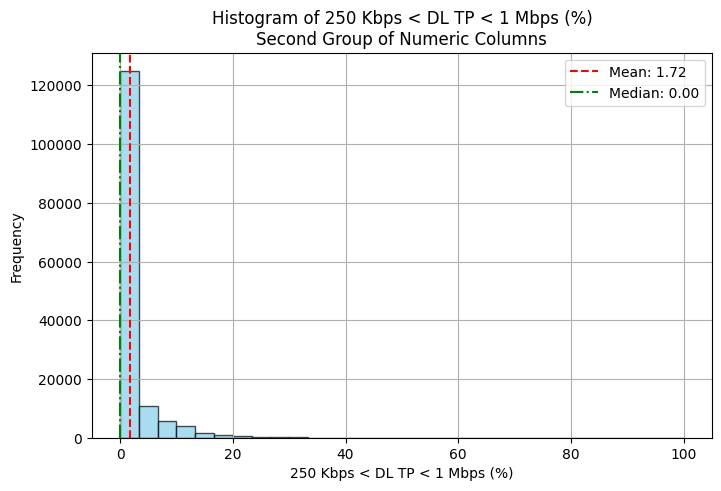

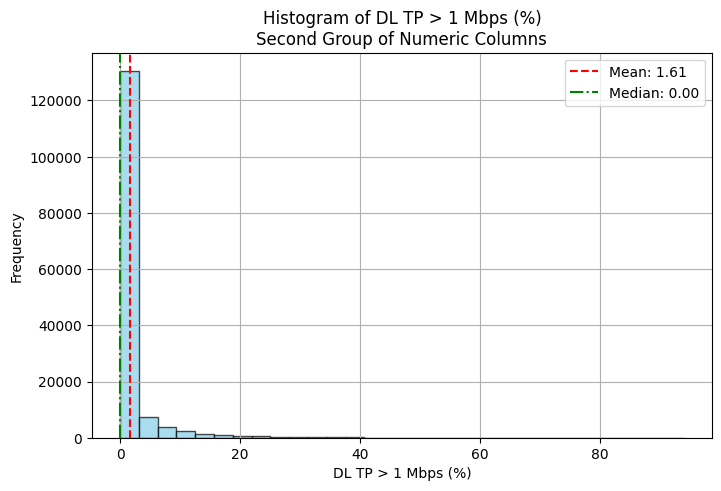

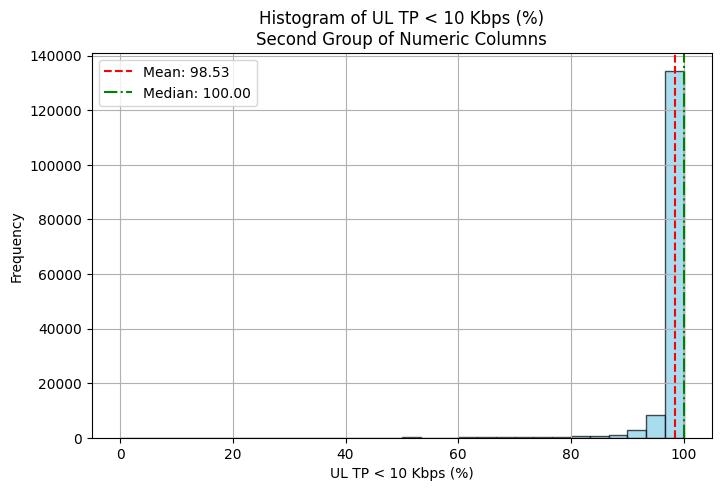

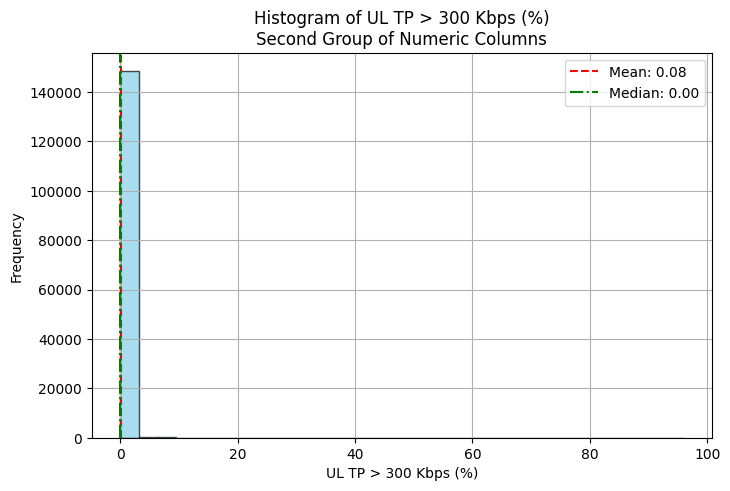

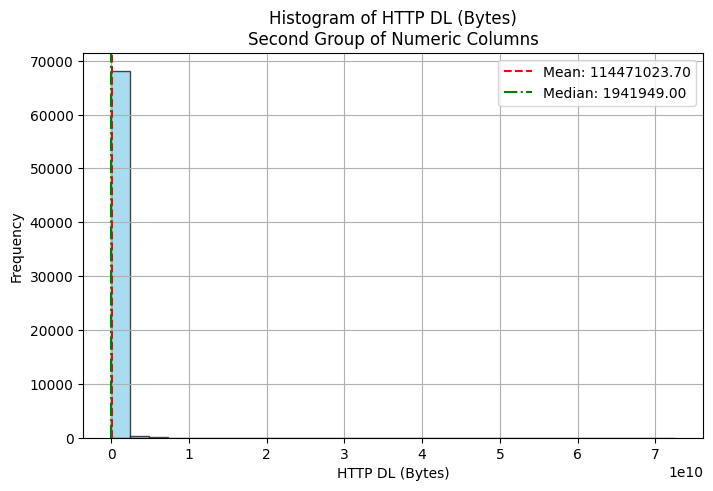

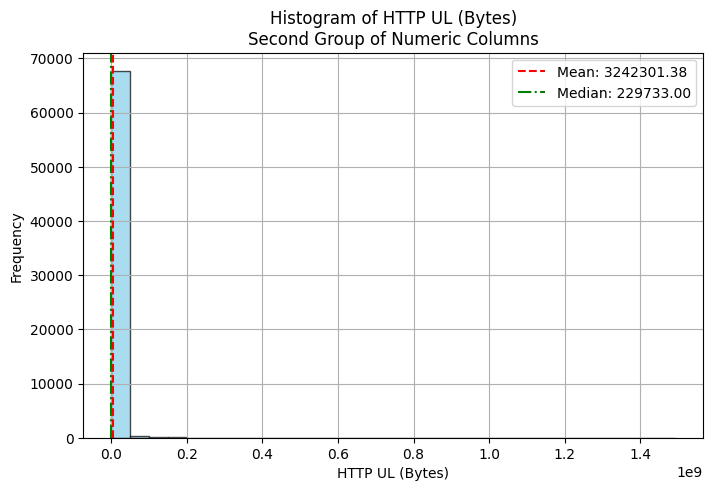

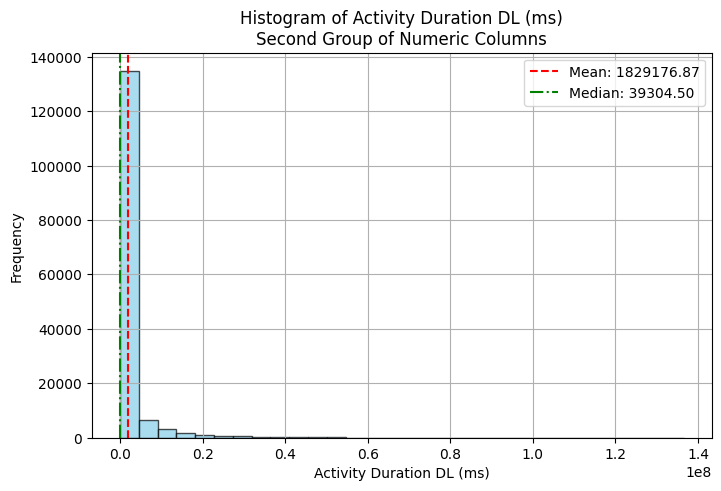

Skewness for third group of columns:
Activity Duration UL (ms)                    7.382557
Dur. (ms).1                                  3.952609
Nb of sec with 125000B < Vol DL              6.592502
Nb of sec with 1250B < Vol UL < 6250B       22.035745
Nb of sec with 31250B < Vol DL < 125000B     6.610541
Nb of sec with 37500B < Vol UL              21.560028
Nb of sec with 6250B < Vol DL < 31250B       6.896050
Nb of sec with 6250B < Vol UL < 37500B      19.642752
Nb of sec with Vol DL < 6250B                9.042166
Nb of sec with Vol UL < 1250B                7.495176
Social Media DL (Bytes)                     -0.002136
Social Media UL (Bytes)                     -0.000359
Google DL (Bytes)                           -0.008092
Google UL (Bytes)                            0.002216
Email DL (Bytes)                            -0.002463
Email UL (Bytes)                             0.007358
dtype: float64


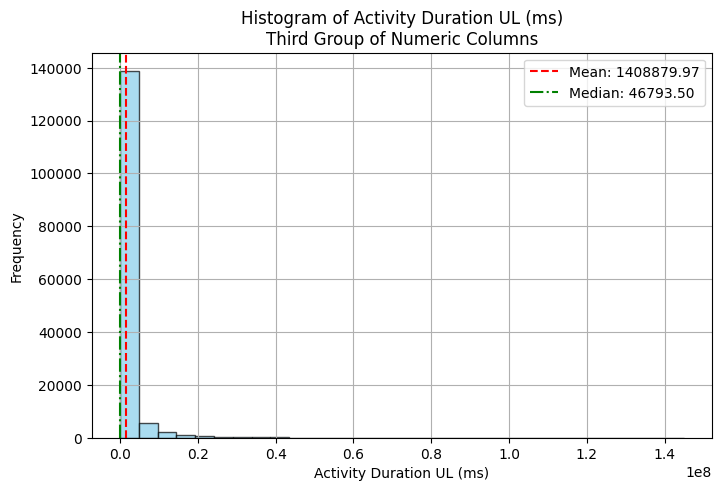

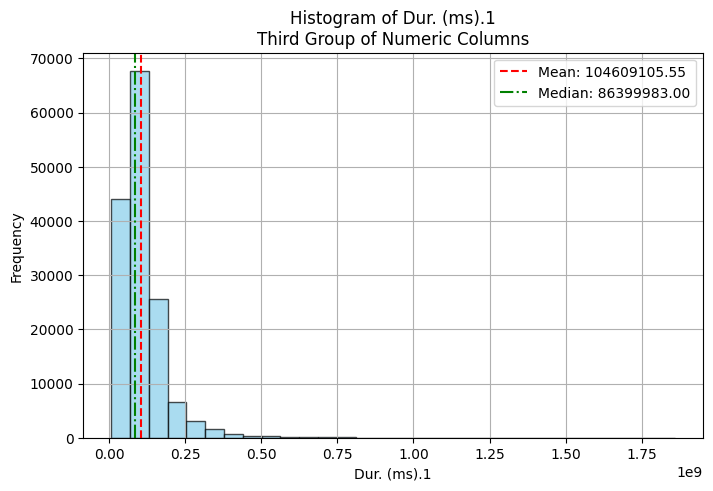

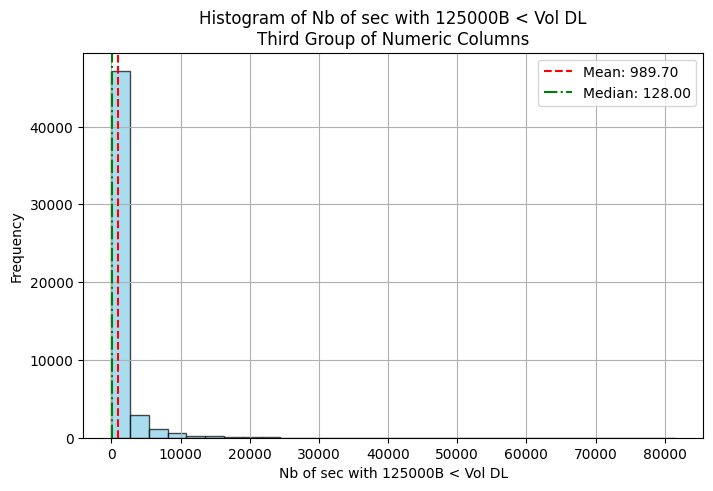

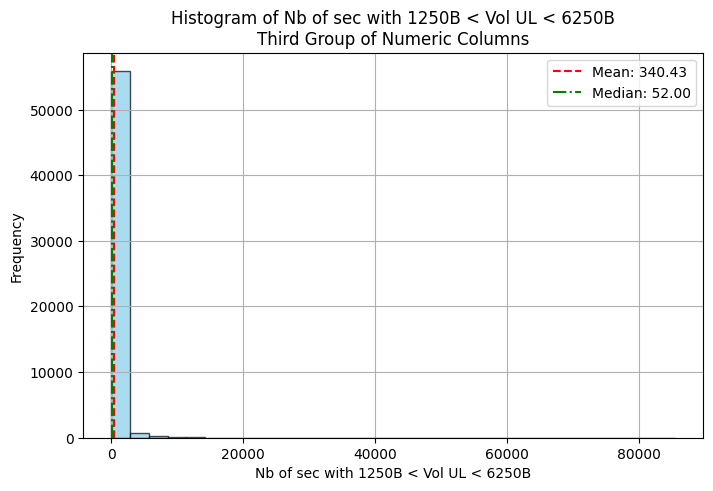

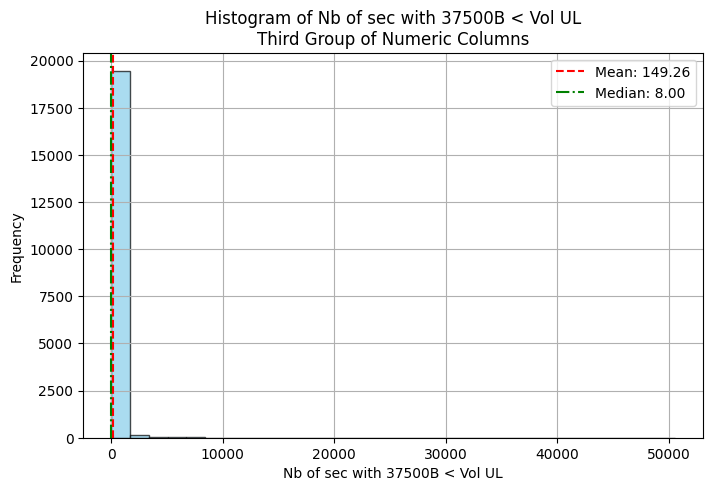

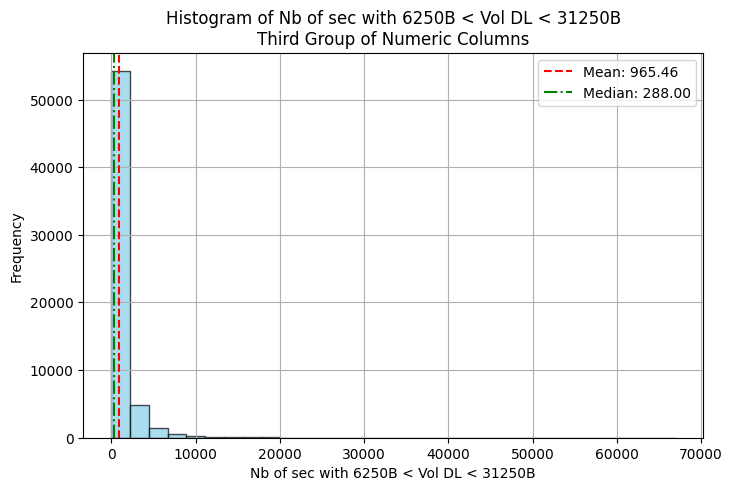

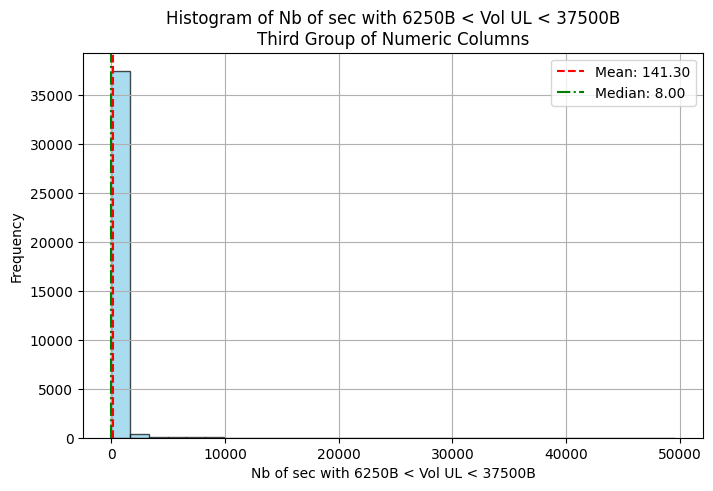

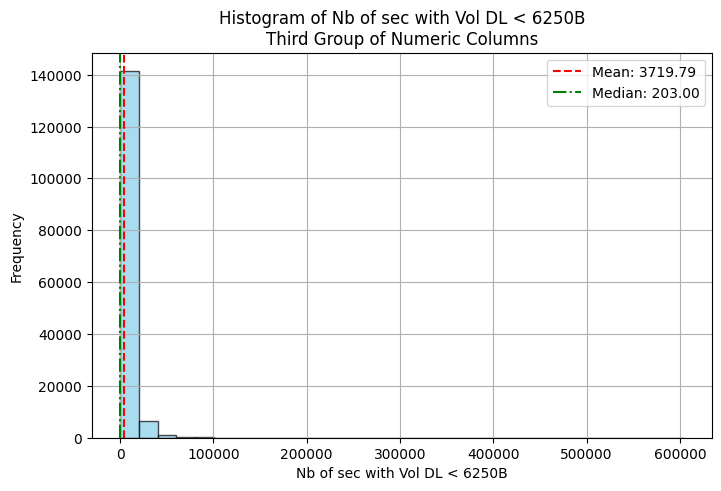

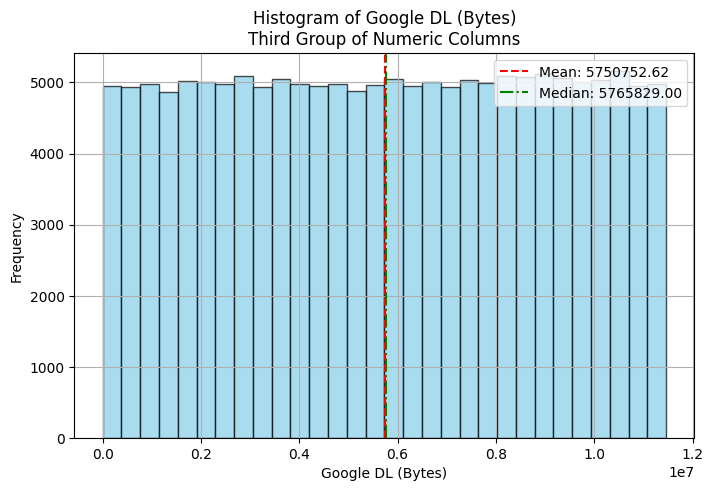

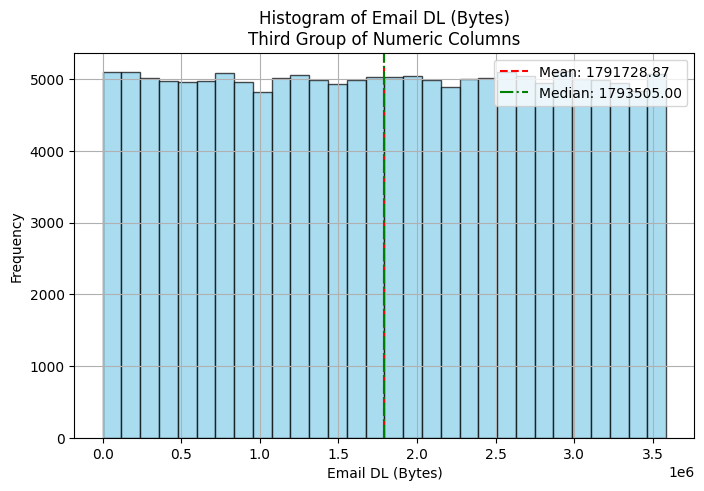

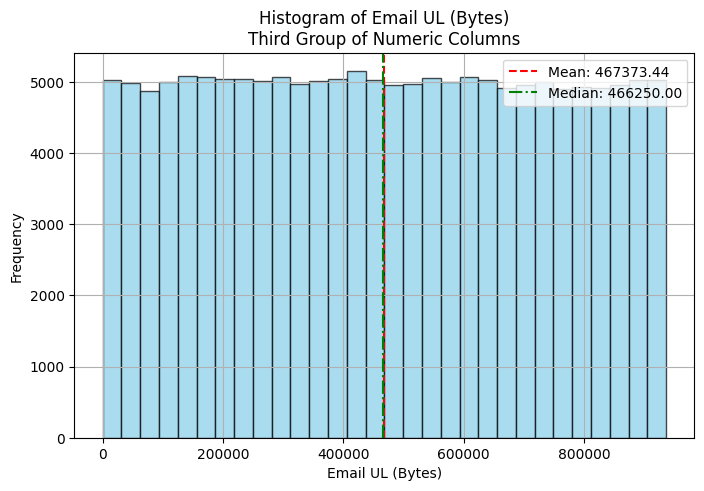

Skewness for fourth group of columns:
Youtube DL (Bytes)    0.000231
Youtube UL (Bytes)   -0.001142
Netflix DL (Bytes)   -0.002442
Netflix UL (Bytes)   -0.000113
Gaming DL (Bytes)    -0.003460
Gaming UL (Bytes)    -0.001840
Other DL (Bytes)      0.001400
Other UL (Bytes)      0.001392
Total UL (Bytes)     -0.002456
Total DL (Bytes)     -0.003153
dtype: float64


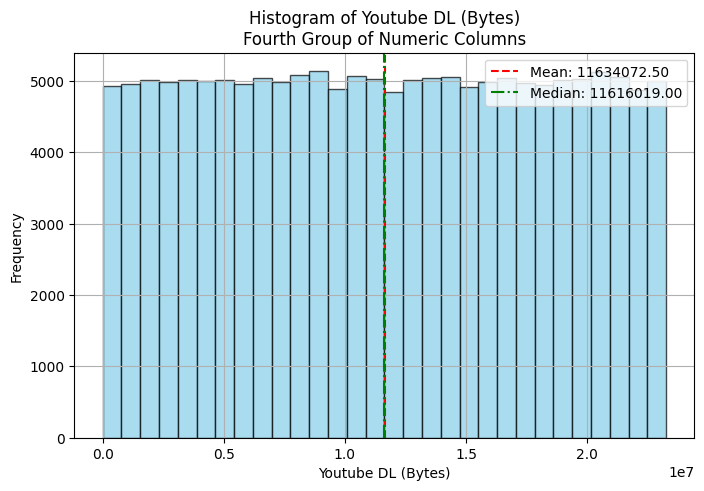

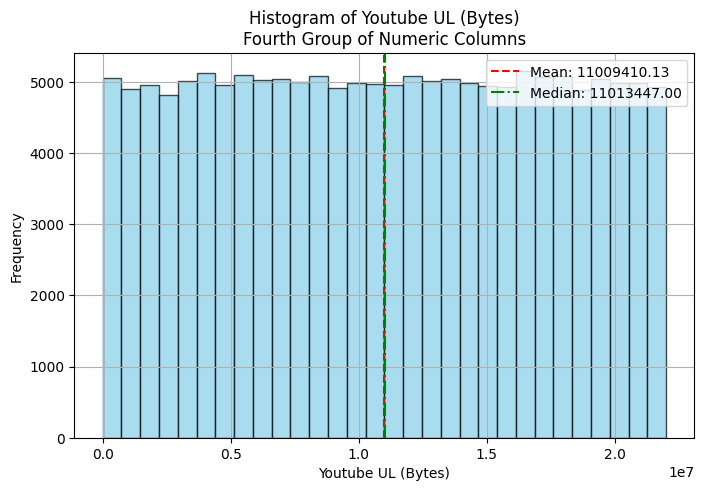

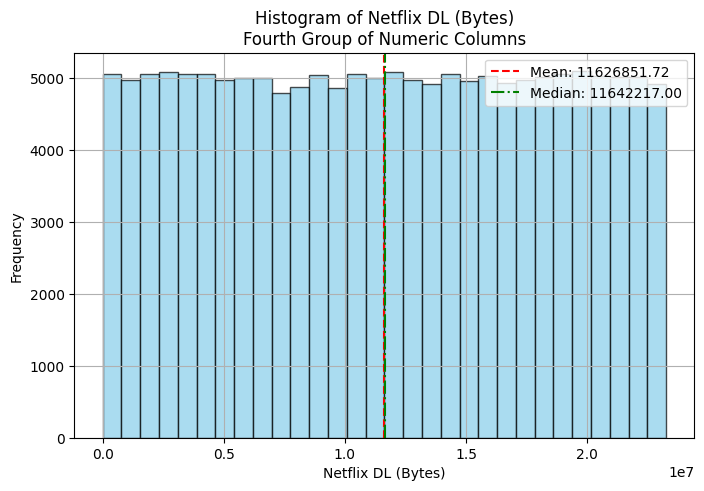

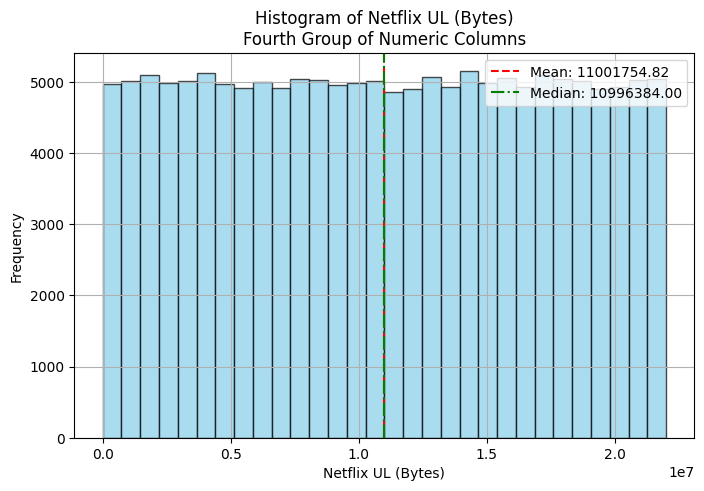

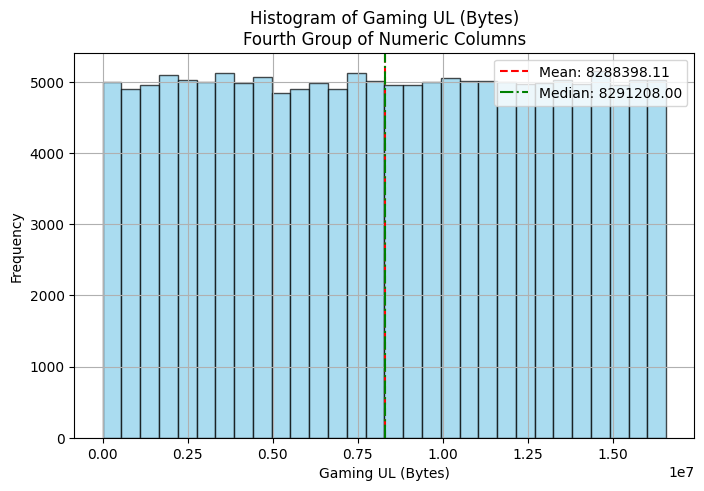

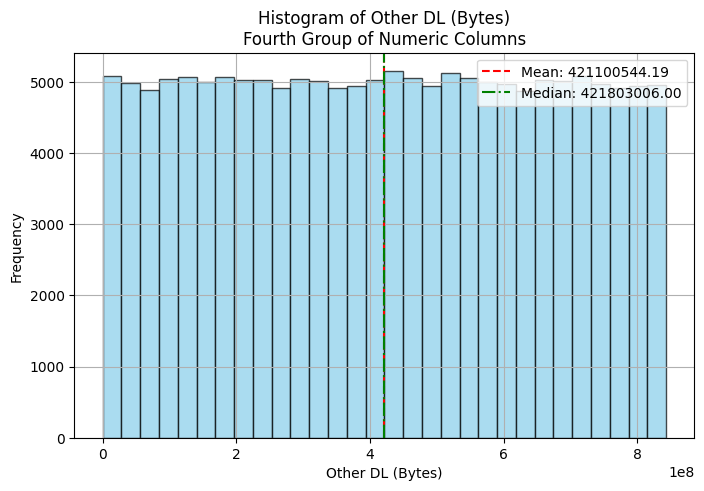

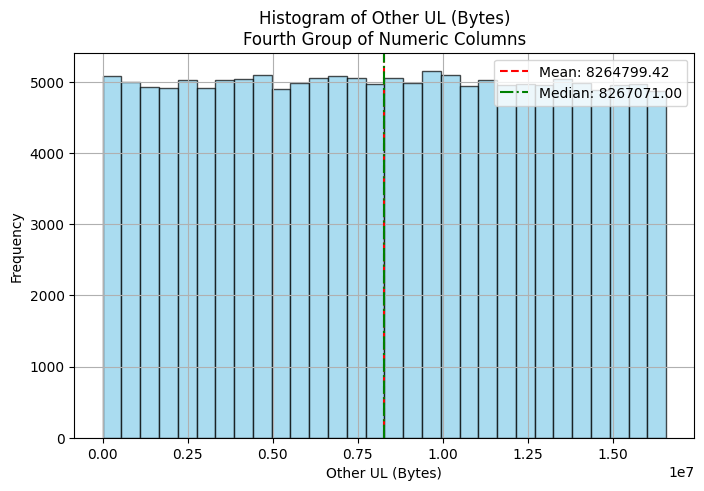

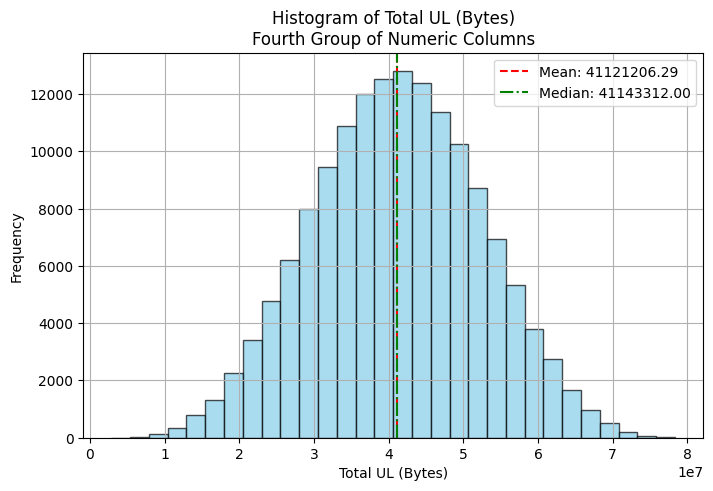

In [35]:
if num_columns < 10:
    print("The dataset has fewer than 10 numeric columns.")
else:
    def plot_histograms_with_lines(group, title):
        """Plots histograms with vertical lines for mean and median."""
        for column in group.columns:
            plt.figure(figsize=(8, 5))
            group[column].hist(bins=30, color='skyblue', edgecolor='black', alpha=0.7)
            
            # Add vertical lines for mean and median
            mean_val = group[column].mean()
            median_val = group[column].median()
            
            plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
            plt.axvline(median_val, color='green', linestyle='-.', linewidth=1.5, label=f'Median: {median_val:.2f}')
            
            # Add title and legend
            plt.title(f'Histogram of {column}\n{title}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.legend()
            plt.show()

    # First group of numeric columns
    first_group = numeric_data.iloc[:, 3:12]
    first_group_skewness = first_group.skew()
    print("Skewness for first group of columns:")
    print(first_group_skewness)
    plot_histograms_with_lines(first_group, "First Group of Numeric Columns")

    if num_columns > 12:
        # Second group of numeric columns
        second_group = numeric_data.iloc[:, 12:24]
        second_group_skewness = second_group.skew()
        print("Skewness for second group of columns:")
        print(second_group_skewness)
        plot_histograms_with_lines(second_group, "Second Group of Numeric Columns")

    if num_columns > 24:
        # Third group of numeric columns
        third_group = numeric_data.iloc[:, 24:40]
        third_group_skewness = third_group.skew()
        print("Skewness for third group of columns:")
        print(third_group_skewness)
        plot_histograms_with_lines(third_group, "Third Group of Numeric Columns")

    if num_columns > 40:
        # Fourth group of numeric columns
        fourth_group = numeric_data.iloc[:, 40:55]
        fourth_group_skewness = fourth_group.skew()
        print("Skewness for fourth group of columns:")
        print(fourth_group_skewness)
        plot_histograms_with_lines(fourth_group, "Fourth Group of Numeric Columns")
    else:
        print("The dataset has fewer than 55 numeric columns.")

As per my observation on the skewness of the graph columns that have missed values all are skiwed, so I decided to use mode for inputation 

In [26]:
# Fill missing values in the specified columns with the mode of each column
for col in null_columns_greater_than_0:
    mode_value = df[col].mode()[0]  # Get the most frequent value (mode)
    df[col].fillna(mode_value, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11224\2824404584.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [27]:
df_cleaned = df
db_instance = Db_Connection()
# Insert the cleaned data into the table
db_instance.insert_cleaned_data(df_cleaned)

# Read back the cleaned_telecom table
cleaned_telecom_data = db_instance.read_data("cleaned_telecom")
print("Cleaned Telecom Data:")
print(cleaned_telecom_data)
# Close the connection
db_instance.close_connection()

Database connection initialized successfully!
Error inserting data: Only %s and %% are supported in the query.
Error reading data: {'S': 'ERROR', 'V': 'ERROR', 'C': '42P01', 'M': 'relation "cleaned_telecom" does not exist', 'P': '15', 'F': 'parse_relation.c', 'L': '1452', 'R': 'parserOpenTable'}
Cleaned Telecom Data:
Empty DataFrame
Columns: []
Index: []
Database connection closed.


In [53]:
# df.columns.to_list

# df['250 Kbps < DL TP < 1 Mbps (%) to (Bytes)'] = df['250 Kbps < DL TP < 1 Mbps (%)'] * 125000, 
# df['DL TP > 1 (Bytes) (%)']  = df['DL TP > 1 (%)'] * 125000

# 'Avg Bearer TP DL (kbps)'
# 'Avg Bearer TP UL (kbps)'
# 'DL TP < 50 Kbps (%)', 
# '50 Kbps < DL TP < 250 Kbps (%)'
# 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
# '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)'

In [62]:
# Verify it
# # Set pandas display options to prevent scientific notation for all numeric columns
# # Set pandas display options to prevent scientific notation
# pd.set_option('display.float_format', '{:,.0f}'.format)

# # Function to convert Kbps or Mbps to Bytes
# def convert_to_bytes(value, unit="kbps"):
#     if unit == "kbps":
#         return value * 125  # Kbps to Bytes (1 Kbps = 125 Bytes)
#     elif unit == "mbps":
#         return value * 125000  # Mbps to Bytes (1 Mbps = 125000 Bytes)
#     return value  # If no conversion is needed

# # Convert the relevant columns (from Kbps or Mbps to Bytes)
# df['Avg Bearer TP DL (bytes)'] = df['Avg Bearer TP DL (kbps)'] * 125 
# df['Avg Bearer TP UL (bytes)'] = df['Avg Bearer TP UL (kbps)'] * 125
# df['Avg Bearer TP DL (bytes) from Mbps'] = df['Avg Bearer TP DL (Mbps)']* 125000 
# df['Avg Bearer TP UL (bytes) from Mbps'] = df['Avg Bearer TP UL (Mbps)']* 125000 


In [35]:
# Boxplots to visualize outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[null_columns_greater_than_0])
plt.xticks(rotation=45)
plt.title("Boxplot for All Columns")
plt.show()

In [28]:
# Check for outliers across all columns
outliers = eda.check_outliers()
outliers

Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
142514  7.349883e+18   4/29/2019 4:32     461.0  4/30/2019 16:56   418.0   
145415  7.349883e+18   4/29/2019 6:09     784.0  4/30/2019 13:55   817.0   
145847  1.311448e+19   4/29/2019 6:22     319.0   4/30/2019 9:36   250.0   
147062  1.311448e+19   4/29/2019 6:48      22.0   4/30/2019 9:41   476.0   
149501  7.349883e+18   4/29/2019 7:23     311.0  4/30/2019 18:23   454.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1       1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2       1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3       1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4       1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   
...           ...           ...            ...           ...   
142514   131003.0  2.082015e+14   3.369842e+10  8.690980e+13   
145415   114369.0  2.082014e+14   3.362786e+10  3.557951e+13   
145847    98046.0  2.082018e+14   3.368702e+10  8.627420e+13   
147062    96759.0  2.082014e+14   3.366009e+10  3.530251e+13   
149501   125994.0  2.082021e+14   3.368630e+10  3.593101e+13   

           Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0       9.16456699548519E+015  ...          15854611.0           2501332.0   
1                     L77566A  ...          20247395.0          19111729.0   
2                     D42335A  ...          19725661.0          14699576.0   
3                     T21824A  ...          21388122.0          15146643.0   
4                     D88865A  ...          15259380.0          18962873.0   
...                       ...  ...                 ...                 ...   
142514                D50549B  ...          12771344.0          20091617.0   
145415                T16786A  ...           8094060.0           2220735.0   
145847                D72336C  ...           2871802.0          20791143.0   
147062                T70061B  ...           3740296.0            542096.0   
149501                D11837B  ...          14197294.0          20478032.0   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0                8198936.0           9656251.0        278082303.0   
1               18338413.0          17227132.0        608750074.0   
2               17587794.0           6163408.0        229584621.0   
3               13994646.0           1097942.0        799538153.0   
4               17124581.0            415218.0        527707248.0   
...                    ...                 ...                ...   
142514          10623504.0          21769536.0        760997630.0   
145415          12373161.0           1851472.0        149814650.0   
145847          10696723.0          19102758.0          3907694.0   
147062            356961.0             59834.0        475832947.0   
149501           3361021.0          21185346.0        514665131.0   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0              14344150.0       171744450.0         8814393.0   
1               1170709.0       526904238.0        15055145.0   
2                395630.0       410692588.0         4215763.0   
3              10849722.0       749039933.0        12797283.0   
4               3529801.0       550709500.0        13910322.0   
...                   ...               ...               ...   
142514         15484064.0       731001647.0        13786362.0   
145415          1278601.0        23644200.0

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

### User Overview Analysis 

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.shape

(148999, 55)

Start by identifying the top 10 handsets used by the customers.

In [3]:
# Check if data is loaded successfully
top_handsets =None
top_each_customers = None
if not df.empty:
    # Group by Handset Type and count occurrences
    top_handsets = (df.groupby("Handset Type").size().reset_index(name="Count").sort_values(by="Count", ascending=False).head(10))
    # If I need group by Handset Type and count occurrences per each customer 
    top_each_customers = (df.groupby(["IMSI", "Handset Type"])
                          .size()
                          .reset_index(name="Count")
                          .sort_values(by="Count", ascending=False)
                          .head(10))
    
# Display the top 10 handsets
print("Top 10 Handsets Used by Customers:")
top_handsets


Top 10 Handsets Used by Customers:


Handset Type  Count
315               Huawei B528S-23A  19752
53         Apple iPhone 6S (A1688)   9401
49          Apple iPhone 6 (A1586)   9004
1392                     undefined   8960
59          Apple iPhone 7 (A1778)   6301
73         Apple iPhone Se (A1723)   5176
66          Apple iPhone 8 (A1905)   4985
78         Apple iPhone Xr (A2105)   4562
953   Samsung Galaxy S8 (Sm-G950F)   4504
75          Apple iPhone X (A1901)   3809

Then, identify the top 3 handset manufacturers

In [4]:
top_manufacturers = None
if not df.empty:
    # Group by Handset Manufacturer and count occurrences
    top_manufacturers = (df.groupby("Handset Manufacturer")
                              .size()
                              .reset_index(name="Count")
                              .sort_values(by="Count", ascending=False)
                              .head(3))
    
# Display the top 3 handset manufacturers
print("Top 3 Handset Manufacturers:")
top_manufacturers

Top 3 Handset Manufacturers:


Handset Manufacturer  Count
5                  Apple  59440
103              Samsung  40689
52                Huawei  34353

Next, identify the top 5 handsets per top 3 handset manufacturer

In [5]:
# Check if data is loaded successfully
top_manufacturers = None
if not df.empty:
    # Identify the top 3 manufacturers
    top_manufacturers = (df.groupby("Handset Manufacturer")
                              .size()
                              .reset_index(name="Count")
                              .sort_values(by="Count", ascending=False)
                              .head(3)["Handset Manufacturer"]
                              .tolist())
    
print("Top 3 Handset Manufacturers:", top_manufacturers)

# Filter data for the top 3 manufacturers
filtered_data = df[df["Handset Manufacturer"].isin(top_manufacturers)]

# Identify top 5 handsets for each manufacturer
top_handsets_per_manufacturer = (
    filtered_data.groupby(["Handset Manufacturer", "Handset Type"])
    .size()
    .reset_index(name="Count")
    .sort_values(["Handset Manufacturer", "Count"], ascending=[True, False])
    .groupby("Handset Manufacturer")
    .head(5)
)

# Display the result
print("Top 5 Handsets per Top 3 Handset Manufacturers:")
top_handsets_per_manufacturer

Top 3 Handset Manufacturers: ['Apple', 'Samsung', 'Huawei']
Top 5 Handsets per Top 3 Handset Manufacturers:


Handset Manufacturer                    Handset Type  Count
35                 Apple         Apple iPhone 6S (A1688)   9401
31                 Apple          Apple iPhone 6 (A1586)   9004
41                 Apple          Apple iPhone 7 (A1778)   6301
55                 Apple         Apple iPhone Se (A1723)   5176
48                 Apple          Apple iPhone 8 (A1905)   4985
83                Huawei                Huawei B528S-23A  19752
104               Huawei                    Huawei E5180   2079
183               Huawei  Huawei P20 Lite Huawei Nova 3E   2015
182               Huawei                      Huawei P20   1476
223               Huawei                  Huawei Y6 2018    996
358              Samsung    Samsung Galaxy S8 (Sm-G950F)   4504
241              Samsung      Samsung Galaxy A5 Sm-A520F   3716
291              Samsung     Samsung Galaxy J5 (Sm-J530)   3689
283              Samsung     Samsung Galaxy J3 (Sm-J330)   3476
356              Samsung    Samsung Galaxy S7 (Sm-G930X)   3194

#### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.   

Aggregate per user the following information in the column 

Top 10 customer by number of xDR sessions

In [7]:
# Check if data is loaded successfully
user_behavior = None
if not df.empty:
    # Aggregate data to count the number of xDR sessions per user
    user_behavior = (df.groupby("IMSI")
                         .agg(Number_of_xDR_Sessions=("Bearer Id", "nunique"))
                         .reset_index()
                         .sort_values(by="Number_of_xDR_Sessions", ascending=False))

# Display the result
print("Aggregated User Behavior (Number of xDR Sessions):")
user_behavior.head(10)

Aggregated User Behavior (Number of xDR Sessions):


IMSI  Number_of_xDR_Sessions
36635   2.082014e+14                      18
15816   2.082010e+14                      17
71579   2.082017e+14                      17
87869   2.082019e+14                      16
25137   2.082010e+14                      15
100695  2.082021e+14                      15
10497   2.082009e+14                      13
89361   2.082019e+14                      12
89748   2.082019e+14                      12
84315   2.082018e+14                      12

Top ten customer by duration of session 

In [8]:
# Convert duration from milliseconds to seconds
df["Duration (seconds)"] = df["Dur. (ms)"] / 1000

# Group by IMSI and aggregate data
sesion_dur_agg = df.groupby("IMSI").agg(
    Total_UL=("Total UL (Bytes)", "sum"),
    Total_DL=("Total DL (Bytes)", "sum"),
    Total_Duration=("Duration (seconds)", "sum")
).reset_index()

# Add a new column for session duration in hours (optional)
sesion_dur_agg["Session Duration (hours)"] = sesion_dur_agg["Total_Duration"] / 3600

sesion_dur_agg.sort_values(by = 'Session Duration (hours)', ascending=False).head(10)

IMSI     Total_UL      Total_DL  Total_Duration  \
15816   2.082010e+14  729577380.0  7.770043e+09       18553.754   
71579   2.082017e+14  689483001.0  8.156743e+09        9966.898   
100695  2.082021e+14  703478581.0  7.811295e+09        9279.434   
36635   2.082014e+14  669650721.0  7.301517e+09        8791.927   
10497   2.082009e+14  566326364.0  5.052068e+09        8744.914   
21720   2.082010e+14  406424372.0  3.593674e+09        6614.270   
37033   2.082014e+14  402180804.0  5.279827e+09        6288.730   
89361   2.082019e+14  435587631.0  4.540607e+09        6287.761   
34037   2.082014e+14  266222647.0  2.334299e+09        5649.882   
2955    2.082003e+14  521518890.0  6.610852e+09        5321.667   

        Session Duration (hours)  
15816                   5.153821  
71579                   2.768583  
100695                  2.577621  
36635                   2.442202  
10497                   2.429143  
21720                   1.837297  
37033                   1.746869  
89361                   1.746600  
34037                   1.569412  
2955                    1.478241

Top 10 customer with the total download (DL) and upload (UL) data on each application

In [9]:
# Group by user column (e.g., IMSI or MSISDN/Number)
user_column = "IMSI"
grouped = df.groupby(user_column)

# Aggregate required metrics
aggregated_data = grouped.agg(
    number_of_sessions=('Bearer Id', 'count'),  # Count xDR sessions
    total_session_duration=('Dur. (ms)', 'sum'),  # Sum session durations
    total_download=('Total DL (Bytes)', 'sum'),  # Total DL data
    total_upload=('Total UL (Bytes)', 'sum'),  # Total UL data
    youtube_dl=('Youtube DL (Bytes)', 'sum'),  # YouTube DL data
    youtube_ul=('Youtube UL (Bytes)', 'sum'),  # YouTube UL data
    netflix_dl=('Netflix DL (Bytes)', 'sum'),  # Netflix DL data
    netflix_ul=('Netflix UL (Bytes)', 'sum'),  # Netflix UL data
    gaming_dl=('Gaming DL (Bytes)', 'sum'),  # Gaming DL data
    gaming_ul=('Gaming UL (Bytes)', 'sum'),  # Gaming UL data
    other_dl=('Other DL (Bytes)', 'sum'),  # Other DL data
    other_ul=('Other UL (Bytes)', 'sum')  # Other UL data
).reset_index()
# Suppress scientific notation for the entire DataFrame
pd.set_option('display.float_format', '{:.0f}'.format)
# Save or display the aggregated data
aggregated_data.sort_values(by = 'number_of_sessions', ascending=False).head(10)
# aggregated_data.to_csv("aggregated_user_data.csv", index=False)

IMSI  number_of_sessions  total_session_duration  \
36635  208201402778052                  18                 8791927   
71579  208201715944176                  17                 9966898   
15816  208201007176097                  17                18553754   
87869  208201906760163                  16                 4035428   
25137  208201009693091                  15                 4865947   
100695 208202100881019                  15                 9279434   
10497  208200853859127                  13                 8744914   
84315  208201771999179                  12                 4703516   
89748  208201907697231                  12                 5207990   
2955   208200313716101                  12                 5321667   

        total_download  total_upload  youtube_dl  youtube_ul  netflix_dl  \
36635       7301516540     669650721   164048706   210434341   199479238   
71579       8156743493     689483001   199823443   194546775   179585986   
15816       7770043342     729577380   237883033   215075736   193912238   
87869       7081602462     624260321   119658146   138332942   196277206   
25137       7309541816     581568792   158665235   158745337   161626462   
100695      7811295382     703478581   194068298   202220900   146500839   
10497       5052067690     566326364   141972692   173258618   167932406   
84315       5309478912     445251947   187323322   121467452   144623204   
89748       5096079437     391775856    83169358    96517390   151330389   
2955        6610851624     521518890   174245981   128923126   167023809   

        netflix_ul  gaming_dl  gaming_ul   other_dl  other_ul  
36635    129246502 6745733519  141838597 8025476831 142400945  
71579    181815060 7622035401  127396833 7495297541 143966031  
15816    163068369 7171883799  154789688 6201652608 152930478  
87869    203241873 6609900470  115658741 6182550577 134864910  
25137    147466697 6863307038  107260559 6665073714 133441436  
100695   188142430 7316364172  144681056 4590038280 126096213  
10497    146007082 4623424261  102197663 4837533804 103984990  
84315    122417693 4880017359   92335582 5039746694  78044196  
89748    114043873 4766392734   80270693 4059957856  69984867  
2955     151323737 6170942911   97676681 3988504057 113141379

Customer with total download (DL) and upload (UL) data

In [10]:
# Aggregate data by IMSI
aggregated_data = df.groupby('IMSI').agg({
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum',
}).reset_index()

# Calculate the total data volume for each application (Download + Upload)
aggregated_data['Total Youtube (Bytes) DL_UL'] = aggregated_data['Youtube DL (Bytes)'] + aggregated_data['Youtube UL (Bytes)']
aggregated_data['Total Netflix (Bytes) DL_UL'] = aggregated_data['Netflix DL (Bytes)'] + aggregated_data['Netflix UL (Bytes)']
aggregated_data['Total Gaming (Bytes) DL_UL'] = aggregated_data['Gaming DL (Bytes)'] + aggregated_data['Gaming UL (Bytes)']
aggregated_data['Total Other (Bytes) DL_UL'] = aggregated_data['Other DL (Bytes)'] + aggregated_data['Other UL (Bytes)']

# Optionally, you can drop individual columns if you only want total per application
aggregated_data = aggregated_data[['IMSI', 'Total Youtube (Bytes) DL_UL', 'Total Netflix (Bytes) DL_UL', 
                                   'Total Gaming (Bytes) DL_UL', 'Total Other (Bytes) DL_UL']]

# Display the result
aggregated_data.head(10)

IMSI  Total Youtube (Bytes) DL_UL  Total Netflix (Bytes) DL_UL  \
0 204047108489451                     40940710                     28846230   
1 204080810288647                     11959905                     26592300   
2 208200101016140                     19882439                     31830562   
3 208200101127285                     25657632                     27785852   
4 208200101148045                     13840201                     57343415   
5 208200101148074                     19596808                     34177184   
6 208200101148075                     50907243                     29882137   
7 208200101148136                     11823461                     17047546   
8 208200101148139                     16310061                     25274811   
9 208200101148152                     35885492                     25595503   

   Total Gaming (Bytes) DL_UL  Total Other (Bytes) DL_UL  
0                    43070260                  401360457  
1                   178048738                  470526473  
2                     9124516                  515973704  
3                   344105897                  309610741  
4                   917684766                 1079435419  
5                   632745679                  549222257  
6                   835218898                  479778260  
7                   939598732                 1069429486  
8                   400273809                  799065942  
9                   290007171                  354263472

In [65]:
# data = df
# # Check for missing values
# missing_summary = data.isnull().sum()

# # Replace missing values with column mean
# data.fillna(data.mean(), inplace=True)

# # Identify and treat outliers using z-score
# z_scores = np.abs(zscore(data.select_dtypes(include=np.number)))
# data = data[(z_scores < 3).all(axis=1)]

# print("Missing values treated and outliers handled.")

### Segment Users into Decile Classes

In [11]:
# 1. Aggregate data by IMSI for total duration and data usage
aggregated_data = df.groupby('IMSI').agg({
    'Dur. (ms)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum',
}).reset_index()

# 2. Calculate the total data volume (Download + Upload) for each application
aggregated_data['Total Youtube (Bytes)'] = aggregated_data['Youtube DL (Bytes)'] + aggregated_data['Youtube UL (Bytes)']
aggregated_data['Total Netflix (Bytes)'] = aggregated_data['Netflix DL (Bytes)'] + aggregated_data['Netflix UL (Bytes)']
aggregated_data['Total Gaming (Bytes)'] = aggregated_data['Gaming DL (Bytes)'] + aggregated_data['Gaming UL (Bytes)']
aggregated_data['Total Other (Bytes)'] = aggregated_data['Other DL (Bytes)'] + aggregated_data['Other UL (Bytes)']

# 3. Calculate the total data volume across all applications
aggregated_data['Total Data (Bytes)'] = aggregated_data[['Total Youtube (Bytes)', 'Total Netflix (Bytes)', 'Total Gaming (Bytes)', 'Total Other (Bytes)']].sum(axis=1)

# 4. Segment users into decile classes based on total session duration
aggregated_data['Decile'] = pd.qcut(aggregated_data['Dur. (ms)'], 10, labels=False) + 1  # Labels from 1 to 10 for deciles

# 5. Compute total data (DL + UL) per decile class
decile_data = aggregated_data.groupby('Decile').agg({
    'Total Data (Bytes)': 'sum',
    'Total Youtube (Bytes)': 'sum',
    'Total Netflix (Bytes)': 'sum',
    'Total Gaming (Bytes)': 'sum',
    'Total Other (Bytes)': 'sum',
}).reset_index()

# Display the result
decile_data

Decile  Total Data (Bytes)  Total Youtube (Bytes)  Total Netflix (Bytes)  \
0       1       9925122668839           248923483379           249544138526   
1       2      11094103680066           276805029263           278721375657   
2       3      11853282277071           297097584388           298062862520   
3       4      11057663855689           276705351643           274087871555   
4       5       9486625234593           234517255970           236299607122   
5       6      11776930178943           293584693490           293270195156   
6       7      11164411172057           279342472476           276512330143   
7       8      14302170699038           358427863178           358696890123   
8       9      16990744286668           424704135669           425453165356   
9      10      27201164259524           683606115108           680992948204   

   Total Gaming (Bytes)  Total Other (Bytes)  
0         4721668218538        4704986828396  
1         5312012683958        5226564591188  
2         5638222401330        5619899428833  
3         5244409458107        5262461174384  
4         4492999601615        4522808769886  
5         5584254053649        5605821236648  
6         5345381769356        5263174600082  
7         6798542350777        6786503594960  
8         8076782717483        8063804268160  
9        12911765502023       12924799694189

### Basic Metrics Analysis
#### Descriptive Statistics

In [12]:

metrics = aggregated_data[['Dur. (ms)', 'Total Data (Bytes)', 'Total Youtube (Bytes)', 'Total Netflix (Bytes)', 'Total Gaming (Bytes)', 'Total Other (Bytes)']].describe()

# Calculate additional metrics like median, and standard deviation
median_values = aggregated_data.median()
std_deviation = aggregated_data.std()

# Print the basic metrics
metrics


Dur. (ms)  Total Data (Bytes)  Total Youtube (Bytes)  \
count     106878              106878                 106878   
mean      146339          1261739725               31566028   
std       186557           832235410               21307159   
min         7142            53091666                  78903   
25%        71642           758194964               18627273   
50%       102831          1064377910               26800807   
75%       172799          1496182006               37937933   
max     18553754         16144467070              452958769   

       Total Netflix (Bytes)  Total Gaming (Bytes)  Total Other (Bytes)  
count                 106878                106878               106878  
mean                31546636             599992877            598634183  
std                 21301953             449375939            449201588  
min                   184569                306358               149045  
25%                 18565362             288208911            285681642  
50%                 26720842             542398086            539716388  
75%                 37980335             777483634            775345186  
max                399519079            7749432234           8167877776

In [16]:
print("Median values:\n")
median_values


Median values:



IMSI                    208201546186128
Dur. (ms)                        102831
Youtube DL (Bytes)             14603004
Youtube UL (Bytes)             13877214
Netflix DL (Bytes)             14638225
Netflix UL (Bytes)             13881719
Gaming DL (Bytes)             532588310
Gaming UL (Bytes)              10446182
Other DL (Bytes)              529891113
Other UL (Bytes)               10378425
Total Youtube (Bytes)          26800807
Total Netflix (Bytes)          26720842
Total Gaming (Bytes)          542398086
Total Other (Bytes)           539716388
Total Data (Bytes)           1064377910
Decile                                5
dtype: float64

In [17]:
print("Standard Deviation values:\n")
std_deviation

Standard Deviation values:



IMSI                    25395568455
Dur. (ms)                    186557
Youtube DL (Bytes)         12329501
Youtube UL (Bytes)         11602986
Netflix DL (Bytes)         12324098
Netflix UL (Bytes)         11615030
Gaming DL (Bytes)         444246274
Gaming UL (Bytes)           8737275
Other DL (Bytes)          444051326
Other UL (Bytes)            8711541
Total Youtube (Bytes)      21307159
Total Netflix (Bytes)      21301953
Total Gaming (Bytes)      449375939
Total Other (Bytes)       449201588
Total Data (Bytes)        832235410
Decile                            3
dtype: float64

### Non-Graphical Univariate Analysis
#### Dispersion Metrics

In [18]:
# Calculate the dispersion parameters manually for each quantitative variable
dispersion_metrics = aggregated_data[['Dur. (ms)', 'Total Data (Bytes)', 
                                      'Total Youtube (Bytes)', 'Total Netflix (Bytes)', 
                                      'Total Gaming (Bytes)', 'Total Other (Bytes)']]

# Min, max, mean, standard deviation, variance
min_vals = dispersion_metrics.min()
max_vals = dispersion_metrics.max()
mean_vals = dispersion_metrics.mean()
std_vals = dispersion_metrics.std()
var_vals = dispersion_metrics.var()

# 25th, 50th (median), and 75th percentiles
percentiles_25 = dispersion_metrics.quantile(0.25)
percentiles_50 = dispersion_metrics.quantile(0.50)
percentiles_75 = dispersion_metrics.quantile(0.75)

# Range and Interquartile Range (IQR)
range_vals = max_vals - min_vals
IQR_vals = percentiles_75 - percentiles_25

# Create a final DataFrame with all dispersion parameters
dispersion_summary = pd.DataFrame({
    'min': min_vals,
    'max': max_vals,
    'mean': mean_vals,
    'std': std_vals,
    'variance': var_vals,
    '25th_percentile': percentiles_25,
    '50th_percentile': percentiles_50,
    '75th_percentile': percentiles_75,
    'range': range_vals,
    'IQR': IQR_vals
})

# Print the results
dispersion_metrics

Dur. (ms)  Total Data (Bytes)  Total Youtube (Bytes)  \
0          869844           514217657               40940710   
1          877385           687127416               11959905   
2           86019           576811221               19882439   
3           86254           707160122               25657632   
4          573923          2068303801               13840201   
...           ...                 ...                    ...   
106873     127367          1289277235               11621474   
106874     168543          1229599289               34857460   
106875      86399           777578439               29190696   
106876      56613          1418873654               24909498   
106877     226790          1221494347               40017722   

        Total Netflix (Bytes)  Total Gaming (Bytes)  Total Other (Bytes)  
0                    28846230              43070260            401360457  
1                    26592300             178048738            470526473  
2                    31830562               9124516            515973704  
3                    27785852             344105897            309610741  
4                    57343415             917684766           1079435419  
...                       ...                   ...                  ...  
106873               10767515             678493990            588394256  
106874               30735254             411382679            752623896  
106875               19605741             272046636            456735366  
106876               10914208             788569459            594480489  
106877               19949230             622972742            538554653  

[106878 rows x 6 columns]

### Graphical Univariate Analysis
 #### Plots
**Histogram:** Distribution of quantitative variables. <br>
**Box Plot:** Outliers and spread. <br>
**Bar Plot:** Total data by decile class. <br>

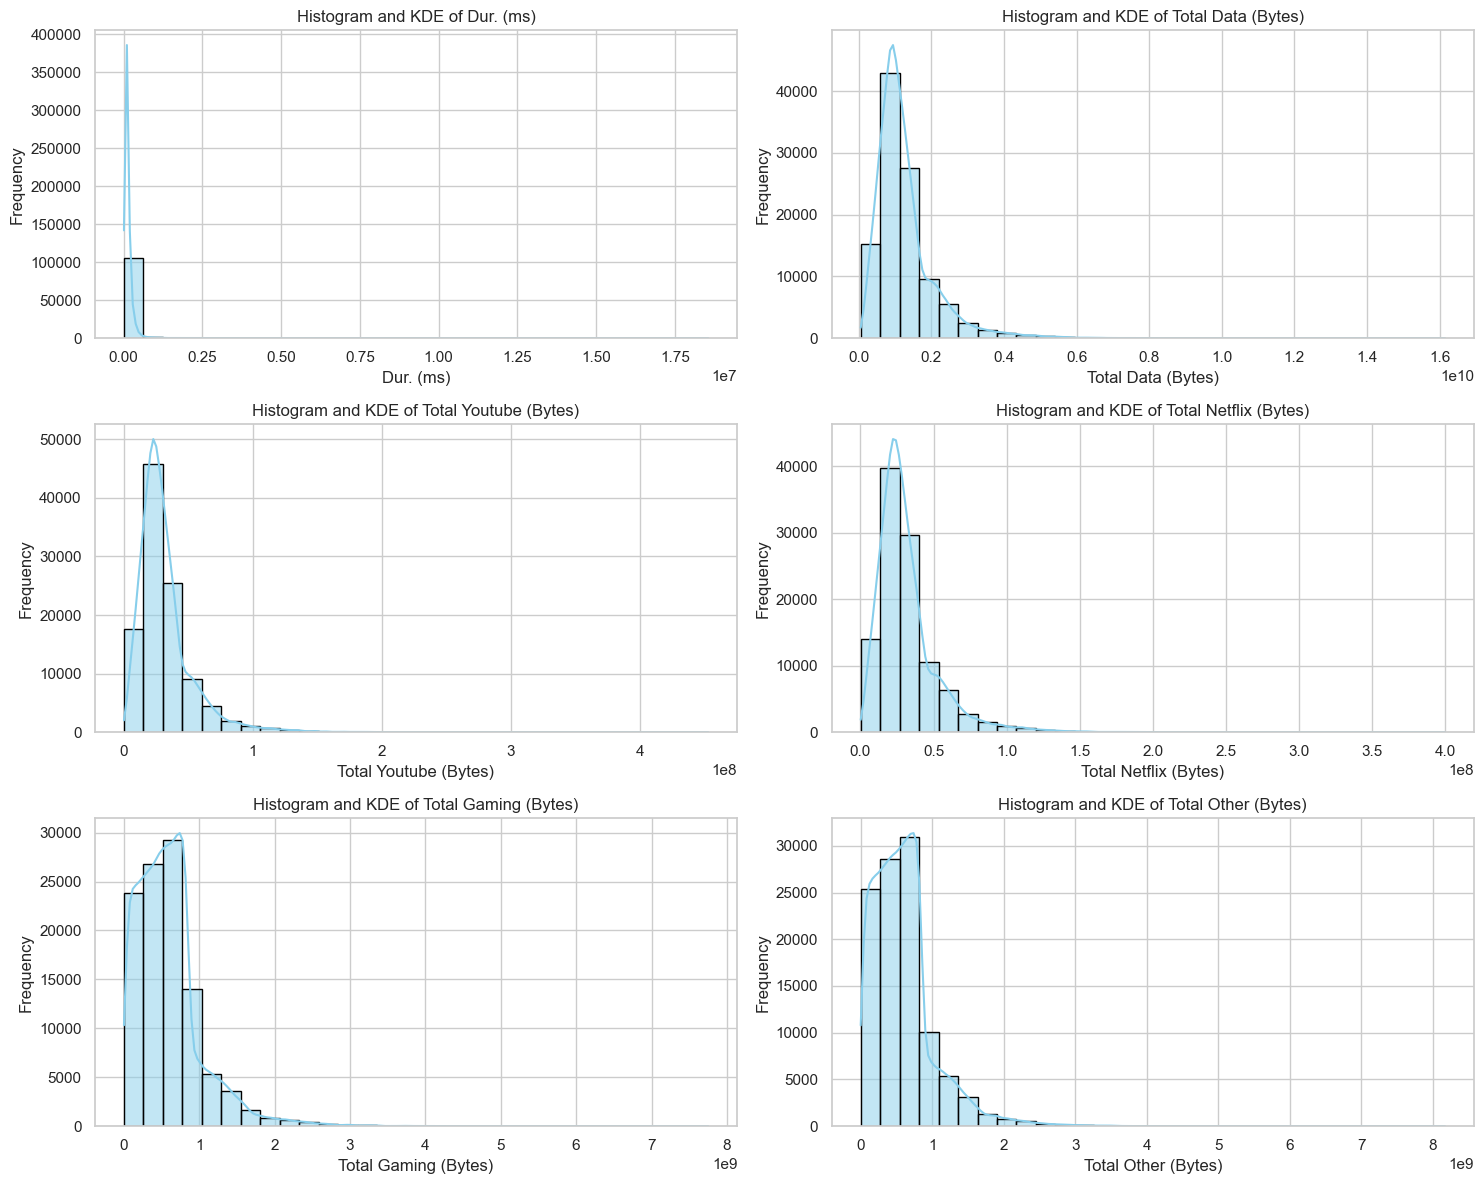

In [19]:

# Set the style for seaborn plots
sns.set(style="whitegrid")

# List of the quantitative variables to plot
quantitative_vars = ['Dur. (ms)', 'Total Data (Bytes)', 'Total Youtube (Bytes)', 
                     'Total Netflix (Bytes)', 'Total Gaming (Bytes)', 'Total Other (Bytes)']

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot each variable in a subplot
for i, var in enumerate(quantitative_vars):
    ax = axes[i // 2, i % 2]  # Determine position of subplot (3 rows, 2 columns)
    
    # Histogram
    sns.histplot(aggregated_data[var], bins=30, kde=True, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram and KDE of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    
# Adjust layout for readability
plt.tight_layout()
plt.show()

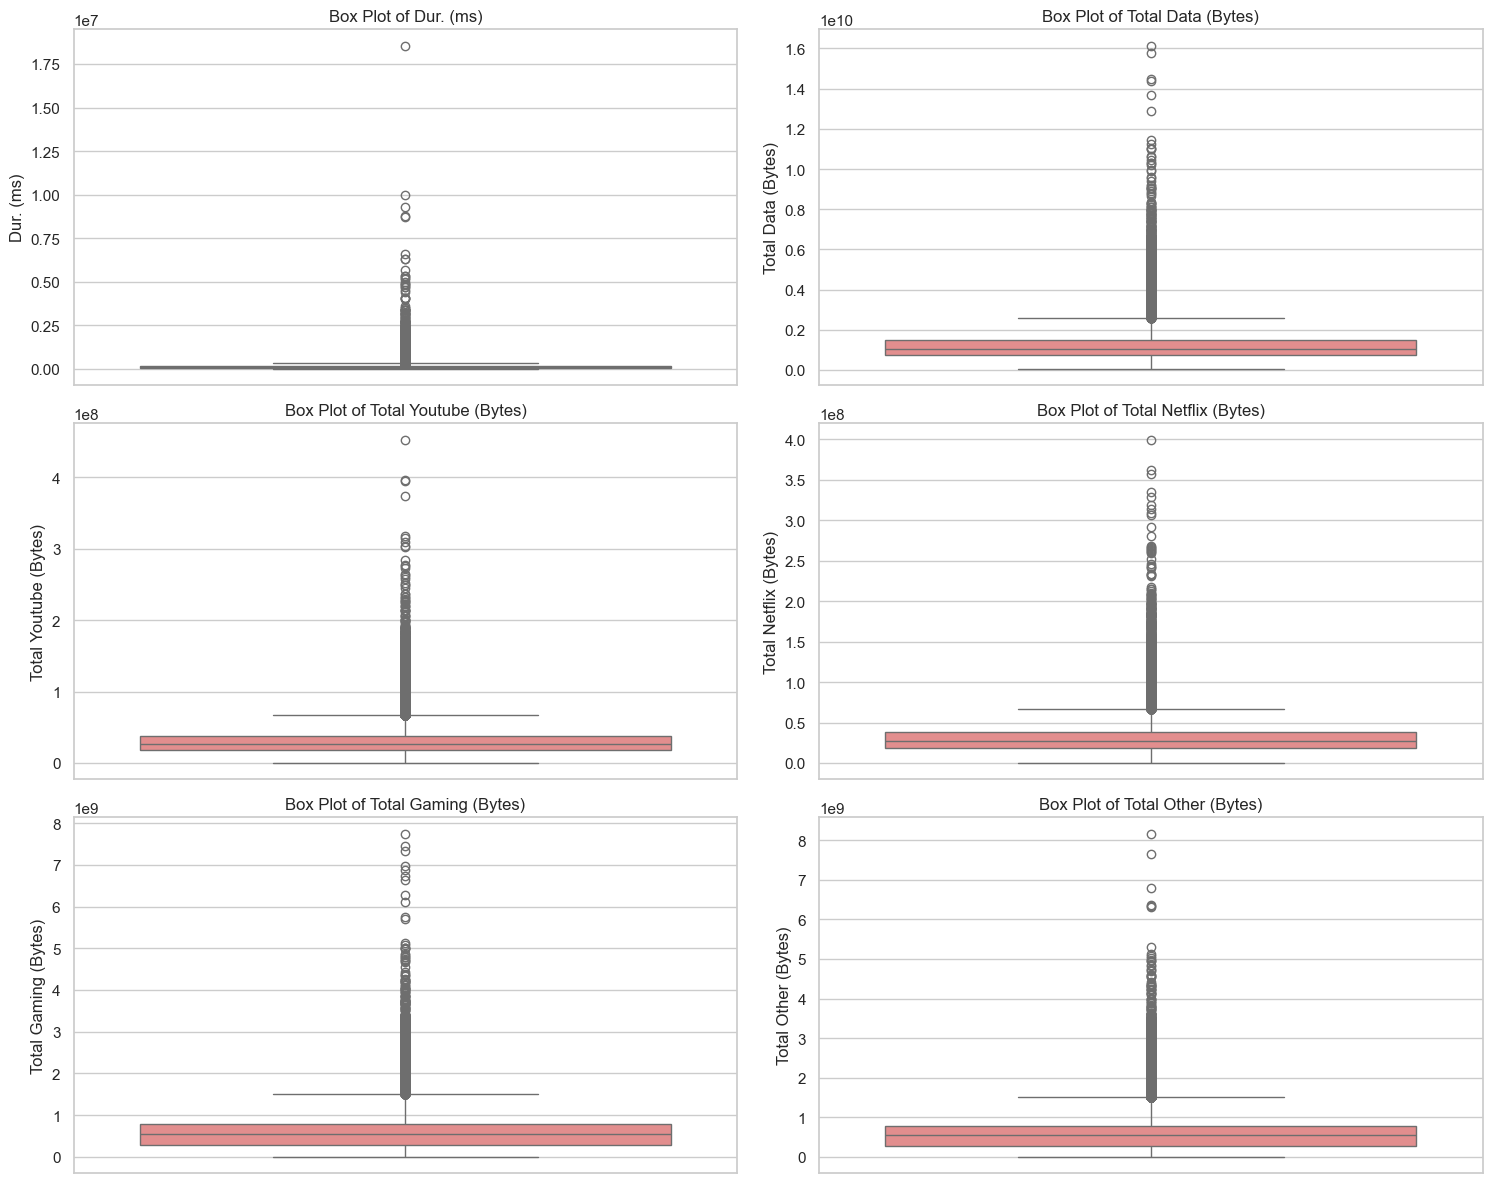

In [20]:
# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot each variable in a subplot
for i, var in enumerate(quantitative_vars):
    ax = axes[i // 2, i % 2]  # Determine position of subplot (3 rows, 2 columns)
    
    # Box plot
    sns.boxplot(data=aggregated_data, y=var, ax=ax, color='lightcoral')
    ax.set_title(f'Box Plot of {var}')
    ax.set_xlabel('')  # No x-axis label needed for box plot
    ax.set_ylabel(var)
    
# Adjust layout for readability
plt.tight_layout()
plt.show()

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot each variable in a subplot
for i, var in enumerate(quantitative_vars):
    ax = axes[i // 2, i % 2]  # Determine position of subplot (3 rows, 2 columns)
    
    # Bar plot (assuming aggregated_data[var] contains discrete categories)
    sns.barplot(x=aggregated_data[var].value_counts().index, 
                y=aggregated_data[var].value_counts().values, 
                ax=ax, palette='viridis')
    ax.set_title(f'Bar Plot of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    
# Adjust layout for readability
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1028\1446587892.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aggregated_data[var].value_counts().index,
C:\Users\Admin\AppData\Local\Temp\ipykernel_1028\1446587892.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aggregated_data[var].value_counts().index,


### Bivariate Analysis
#### Relationship Between Applications and Total Data

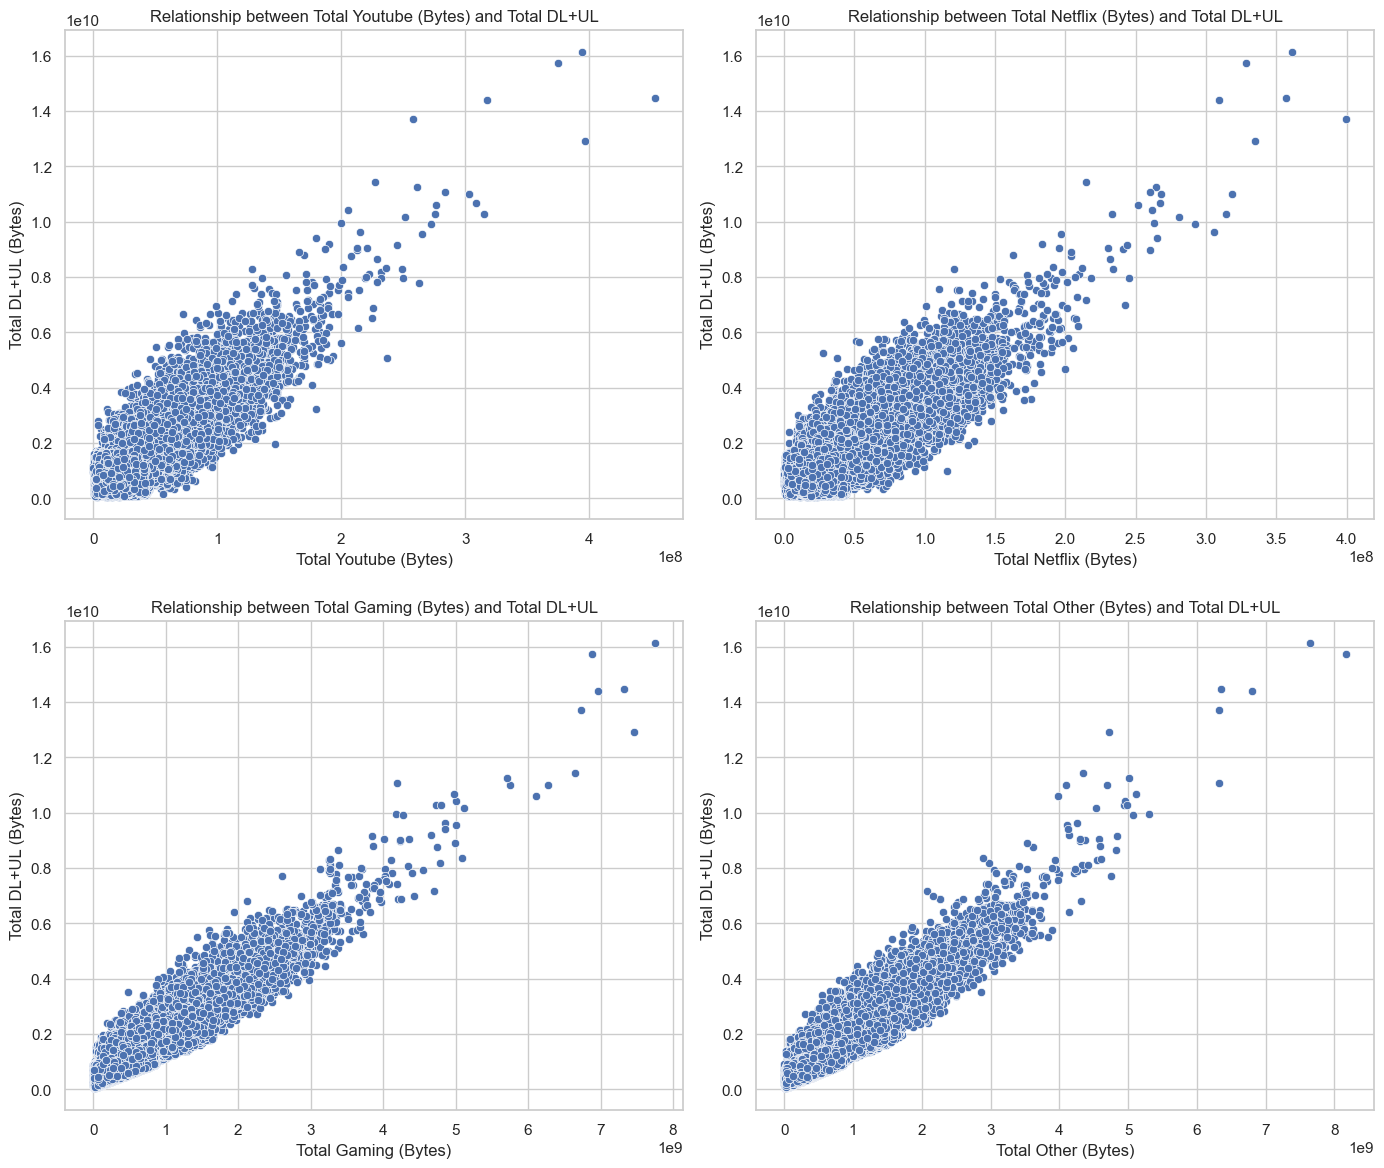

In [74]:
# Create a new column for the total data (DL+UL)
aggregated_data['Total DL+UL (Bytes)'] = (aggregated_data['Total Youtube (Bytes)'] + 
                                           aggregated_data['Total Netflix (Bytes)'] + 
                                           aggregated_data['Total Gaming (Bytes)'] + 
                                           aggregated_data['Total Other (Bytes)'])

# List of applications to explore
applications = ['Total Youtube (Bytes)', 'Total Netflix (Bytes)', 
                'Total Gaming (Bytes)', 'Total Other (Bytes)']

# Create a figure to hold scatter plots for each application vs Total DL+UL
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Loop through each application and plot scatter plots
for i, app in enumerate(applications):
    ax = axes[i // 2, i % 2]  # Determine subplot position
    
    # Scatter plot of the relationship between application data and total data
    sns.scatterplot(x=aggregated_data[app], y=aggregated_data['Total DL+UL (Bytes)'], ax=ax)
    ax.set_title(f'Relationship between {app} and Total DL+UL')
    ax.set_xlabel(app)
    ax.set_ylabel('Total DL+UL (Bytes)')
    
# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [76]:
# Calculate the correlation matrix between total DL+UL and application data
correlation_matrix = aggregated_data[applications + ['Total DL+UL (Bytes)']].corr()

# Display the correlation matrix
correlation_matrix

Total Youtube (Bytes)  Total Netflix (Bytes)  \
Total Youtube (Bytes)                      1                      1   
Total Netflix (Bytes)                      1                      1   
Total Gaming (Bytes)                       1                      1   
Total Other (Bytes)                        1                      1   
Total DL+UL (Bytes)                        1                      1   

                       Total Gaming (Bytes)  Total Other (Bytes)  \
Total Youtube (Bytes)                     1                    1   
Total Netflix (Bytes)                     1                    1   
Total Gaming (Bytes)                      1                    1   
Total Other (Bytes)                       1                    1   
Total DL+UL (Bytes)                       1                    1   

                       Total DL+UL (Bytes)  
Total Youtube (Bytes)                    1  
Total Netflix (Bytes)                    1  
Total Gaming (Bytes)                     1  
Total Other (Bytes)                      1  
Total DL+UL (Bytes)                      1

In [78]:
# Define the columns to be used for correlation analysis
columns_to_analyze = [#'Social Media (Bytes)', 'Google (Bytes)', 'Email (Bytes)',
                      'Total Youtube (Bytes)', 'Total Netflix (Bytes)', 'Total Gaming (Bytes)', 'Total Other (Bytes)']

# Compute the correlation matrix
correlation_matrix = aggregated_data[columns_to_analyze].corr()
correlation_matrix


Total Youtube (Bytes)  Total Netflix (Bytes)  \
Total Youtube (Bytes)                      1                      1   
Total Netflix (Bytes)                      1                      1   
Total Gaming (Bytes)                       1                      1   
Total Other (Bytes)                        1                      1   

                       Total Gaming (Bytes)  Total Other (Bytes)  
Total Youtube (Bytes)                     1                    1  
Total Netflix (Bytes)                     1                    1  
Total Gaming (Bytes)                      1                    1  
Total Other (Bytes)                       1                    1

### Correlation Analysis
#### Correlation Matrix

In [ ]:
df.columns.to_list

In [39]:
variables = ['social_media_dl', 'google_dl', 'email_dl', 
             'youtube_dl', 'netflix_dl', 'gaming_dl', 'other_dl']

variables = ['youtube_dl', 'netflix_dl', 'gaming_dl', 'other_dl']

correlation_matrix = data[variables].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### Dimensionality Reduction
#### Principal Component Analysis (PCA)

In [80]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assume 'aggregated_data' contains the relevant data columns for PCA
# Select relevant columns (data usage for different applications)
columns_to_pca = [#'Social Media (Bytes)', 'Google (Bytes)', 'Email (Bytes)', 
                  'Total Youtube (Bytes)', 'Total Netflix (Bytes)', 
                  'Total Gaming (Bytes)', 'Total Other (Bytes)']

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(aggregated_data[columns_to_pca])

# Step 2: Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Step 3: Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Calculate the cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Step 5: Show the results
print("Explained Variance Ratio for each component:")
print(explained_variance_ratio)

print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

# Optionally, to reduce the data to fewer dimensions (e.g., 2 components):
pca_2d = PCA(n_components=2)
reduced_data = pca_2d.fit_transform(data_scaled)

# Show the first 2 principal components for a reduced dataset (2D representation)
print("\nFirst 2 principal components:")
reduced_data[:5] # Show the first 5 rows of the reduced data

Explained Variance Ratio for each component:
[0.7452885  0.10329695 0.08610235 0.0653122 ]

Cumulative Explained Variance:
[0.7452885  0.84858545 0.9346878  1.        ]

First 2 principal components:


array([[-0.65333808, -0.57811197],
       [-1.18711956, -0.4557987 ],
       [-1.00272412, -0.79715038],
       [-0.82212073,  0.05064686],
       [ 1.05683727, -0.23100611]])

### My excpected slides concepts 

Dataset overview and variable descriptions. <br>
Missing value and outlier handling.<br>
Key descriptive statistics.<br>
Segmentation results (decile classes).<br>
Key plots and interpretations.<br>
Bivariate and correlation findings.<br>
PCA results and their significance.<br>

In [41]:
df.head()

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   
2                D42335A  ...          19725661.0          14699576.0   
3                T21824A  ...          21388122.0          15146643.0   
4                D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

## 2. Task 2 - User Engagement Analysis

In [43]:
# Convert time columns to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate session frequency for each Bearer Id
session_frequency = df.groupby('Bearer Id').size().reset_index(name='Session Frequency')

# Calculate session duration (already in Dur. (ms))
df['Session Duration (seconds)'] = df['Dur. (ms)'] / 1000

# Calculate total traffic for each session
df['Total Traffic (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Aggregate metrics for each Bearer Id
engagement_metrics = df.groupby('Bearer Id').agg({
    'Session Duration (seconds)': 'sum',  # Total session duration
    'Total Traffic (Bytes)': 'sum',  # Total traffic
    'Start': 'count'  # Session frequency
}).rename(columns={'Start': 'Session Frequency'}).reset_index()

# Display results
engagement_metrics

Bearer Id  Session Duration (seconds)  Total Traffic (Bytes)  \
0       6.917538e+18                      24.534            542426609.0   
1       6.917538e+18                      21.489            748242861.0   
2       6.917538e+18                      27.786            870014786.0   
3       6.917538e+18                      15.635            875392198.0   
4       6.917538e+18                      24.264            646941226.0   
...              ...                         ...                    ...   
134703  1.318654e+19                      80.024            180705804.0   
134704  1.318654e+19                     145.291            423191221.0   
134705  1.318654e+19                      86.399            908608252.0   
134706  1.318654e+19                      86.399            427232744.0   
134707  1.318654e+19                     103.113            373360399.0   

        Session Frequency  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
134703                  1  
134704                  1  
134705                  1  
134706                  1  
134707                  1  

[134708 rows x 4 columns]

### Aggregate Metrics per Customer (MSISDN)

In [45]:
# Aggregate metrics per customer (MSISDN/Number)
customer_metrics = df.groupby('MSISDN/Number').agg({
    'Session Duration (seconds)': 'sum',
    'Total Traffic (Bytes)': 'sum',
    'Bearer Id': 'count'
}).rename(columns={
    'Session Duration (seconds)': 'Total Session Duration (seconds)',
    'Total Traffic (Bytes)': 'Total Traffic (Bytes)',
    'Bearer Id': 'Session Frequency'
}).reset_index()

# Top 10 customers per engagement metric
top_10_duration = customer_metrics.nlargest(10, 'Total Session Duration (seconds)')
top_10_traffic = customer_metrics.nlargest(10, 'Total Traffic (Bytes)')
top_10_frequency = customer_metrics.nlargest(10, 'Session Frequency')

# Display results
print("Top 10 customers by session duration:")
print(top_10_duration)

print("\nTop 10 customers by total traffic:")
print(top_10_traffic)

print("\nTop 10 customers by session frequency:")
print(top_10_frequency)


Top 10 customers by session duration:
       MSISDN/Number  Total Session Duration (seconds)  Total Traffic (Bytes)  \
13180   3.362578e+10                         18553.754           8.499621e+09   
6437    3.361489e+10                          9966.898           8.846226e+09   
92923   3.376054e+10                          9279.434           8.514774e+09   
13526   3.362632e+10                          8791.927           7.971167e+09   
65118   3.366716e+10                          8744.914           5.618394e+09   
50281   3.366284e+10                          6614.270           4.000098e+09   
57160   3.366469e+10                          6288.730           5.682007e+09   
666     3.360313e+10                          6287.761           4.976195e+09   
66029   3.366746e+10                          5649.882           2.600522e+09   
92577   3.376041e+10                          5321.667           7.132371e+09   

       Session Frequency  
13180                 17  
6437            

### Normalize Metrics and Apply K-Means Clustering (k=3)

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

# Normalize the metrics
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(customer_metrics[['Total Session Duration (seconds)', 'Total Traffic (Bytes)', 'Session Frequency']])

# Run k-means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
customer_metrics['Cluster'] = kmeans.fit_predict(normalized_data)

# Add normalized metrics for reference
normalized_df = pd.DataFrame(normalized_data, columns=['Normalized Duration', 'Normalized Traffic', 'Normalized Frequency'])
customer_metrics = pd.concat([customer_metrics, normalized_df], axis=1)

# Display cluster assignments
customer_metrics.head()


   MSISDN/Number  Total Session Duration (seconds)  Total Traffic (Bytes)  \
0   3.360100e+10                           116.720           8.786906e+08   
1   3.360100e+10                           181.230           1.568596e+08   
2   3.360100e+10                           134.969           5.959665e+08   
3   3.360101e+10                            49.878           4.223207e+08   
4   3.360101e+10                            37.104           1.457411e+09   

   Session Frequency  Cluster  Normalized Duration  Normalized Traffic  \
0                  1        2             0.005908            0.095931   
1                  1        2             0.009387            0.014026   
2                  1        2             0.006892            0.063851   
3                  1        2             0.002304            0.044148   
4                  2        0             0.001615            0.161598   

   Normalized Frequency  
0              0.055556  
1              0.055556  
2             

### Compute Stats for Each Cluster

In [47]:
cluster_stats = customer_metrics.groupby('Cluster').agg({
    'Total Session Duration (seconds)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Session Frequency': ['min', 'max', 'mean', 'sum']
}).reset_index()

print("Cluster statistics:")
print(cluster_stats)


Cluster statistics:
  Cluster Total Session Duration (seconds)                         \
                                       min        max        mean   
0       0                           18.235   3174.824  215.100806   
1       1                           49.323  18553.754  572.159112   
2       2                            7.142   1573.420  107.473681   

               Total Traffic (Bytes)                              \
           sum                   min           max          mean   
0  4551317.959          2.842182e+08  1.915933e+09  1.138979e+09   
1  2286919.971          1.085994e+09  8.846226e+09  2.294204e+09   
2  8780599.726          3.324901e+07  1.427100e+09  4.964976e+08   

                Session Frequency                       
            sum               min max      mean    sum  
0  2.409966e+13                 1   4  2.184791  46228  
1  9.169934e+12                 3  18  4.258194  17020  
2  4.056385e+13                 0   2  1.043550  85258  


### Aggregate Traffic per Application

In [48]:
# Aggregate user total traffic per application
app_traffic = df.groupby('MSISDN/Number').agg({
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Derive the total traffic per application
app_traffic['Youtube Traffic'] = app_traffic['Youtube DL (Bytes)'] + app_traffic['Youtube UL (Bytes)']
app_traffic['Netflix Traffic'] = app_traffic['Netflix DL (Bytes)'] + app_traffic['Netflix UL (Bytes)']
app_traffic['Gaming Traffic'] = app_traffic['Gaming DL (Bytes)'] + app_traffic['Gaming UL (Bytes)']

# Top 10 most engaged users per application
top_youtube = app_traffic.nlargest(10, 'Youtube Traffic')
top_netflix = app_traffic.nlargest(10, 'Netflix Traffic')
top_gaming = app_traffic.nlargest(10, 'Gaming Traffic')

print("Top 10 users for YouTube traffic:")
print(top_youtube)

print("\nTop 10 users for Netflix traffic:")
print(top_netflix)

print("\nTop 10 users for Gaming traffic:")
print(top_gaming)


Top 10 users for YouTube traffic:
       MSISDN/Number  Youtube DL (Bytes)  Youtube UL (Bytes)  \
13180   3.362578e+10         237883033.0         215075736.0   
92923   3.376054e+10         194068298.0         202220900.0   
6437    3.361489e+10         199823443.0         194546775.0   
13526   3.362632e+10         164048706.0         210434341.0   
76363   3.367588e+10         158665235.0         158745337.0   
65118   3.366716e+10         141972692.0         173258618.0   
13994   3.362708e+10         187323322.0         121467452.0   
92577   3.376041e+10         174245981.0         128923126.0   
86455   3.369879e+10         166900329.0         135761629.0   
666     3.360313e+10         158976704.0         125113435.0   

       Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
13180         193912238.0         163068369.0       7.171884e+09   
92923         146500839.0         188142430.0       7.316364e+09   
6437          179585986.0         181815060.0       7.622

### Plot Top 3 Applications

In [49]:
import matplotlib.pyplot as plt

# Aggregate total traffic per application
application_totals = {
    'Youtube': app_traffic['Youtube Traffic'].sum(),
    'Netflix': app_traffic['Netflix Traffic'].sum(),
    'Gaming': app_traffic['Gaming Traffic'].sum()
}

# Plot the data
plt.figure(figsize=(8, 6))
plt.bar(application_totals.keys(), application_totals.values(), color=['red', 'blue', 'green'])
plt.title('Top 3 Most Used Applications by Total Traffic')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('Application')
plt.show()


### Optimize k Using the Elbow Method

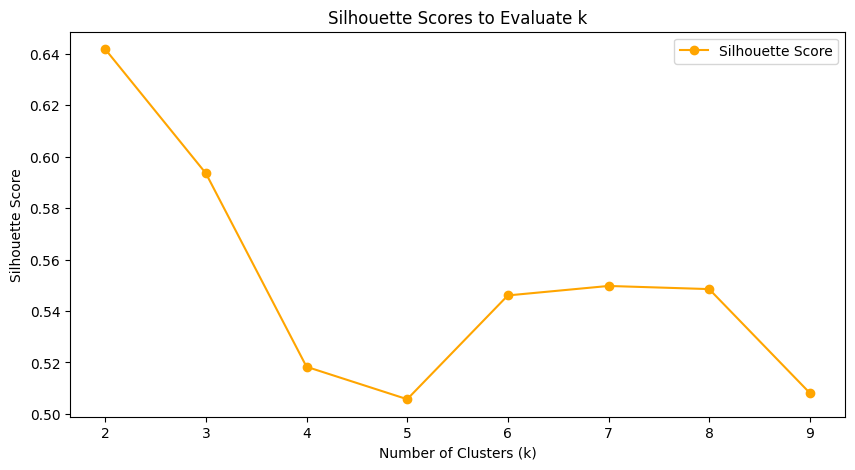

In [50]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine the optimal k
inertia = []
silhouette_scores = []
K = range(2, 10)  # Test k values from 2 to 9

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(normalized_data, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, marker='o', label='Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.title('Silhouette Scores to Evaluate k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()


* Which cluster contains highly engaged users (e.g., highest traffic or duration)?
* How do different engagement levels (low, medium, high) compare across the clusters?
* Which applications contribute the most to engagement?

## 3. Task 3 - Experience Analytics

#### Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable)

In [55]:
df.columns.to_list()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [60]:
# Replace missing values
for col in ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)','Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

# Handle outliers (replace values beyond 3 standard deviations with the mean)
for col in ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)','Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']:
    if col in df.columns:
        mean = df[col].mean()
        std_dev = df[col].std()
        upper_bound = mean + 3 * std_dev
        lower_bound = mean - 3 * std_dev
        df[col] = np.where((df[col] > upper_bound) | (df[col] < lower_bound), mean, df[col])

# Aggregate metrics per customer (MSISDN)
aggregated_metrics = df.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)':'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',  # Average DL RTT
    'Avg RTT UL (ms)': 'mean',  # Average UL RTT
    'Avg Bearer TP DL (kbps)': 'mean',  # Average DL Throughput
    'Avg Bearer TP UL (kbps)': 'mean',  # Average UL Throughput
    'Handset Type': lambda x: x.mode()[0] if not x.mode().empty else None  # Most common handset type
}).reset_index()

# Rename columns for clarity
aggregated_metrics.rename(columns={
    'TCP DL Retrans. Vol (Bytes)':'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)':'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)': 'Average DL RTT',
    'Avg RTT UL (ms)': 'Average UL RTT',
    'Avg Bearer TP DL (kbps)': 'Average DL Throughput',
    'Avg Bearer TP UL (kbps)': 'Average UL Throughput',
    'Handset Type': 'Most Common Handset Type'
}, inplace=True)

# Display results
print(aggregated_metrics)

# Save to a file if needed
aggregated_metrics.to_csv('aggregated_customer_metrics_task_3.csv', index=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10556\2389658413.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


        MSISDN/Number  TCP DL Retrans. Vol (Bytes)  \
0        3.360100e+10                 2.080991e+07   
1        3.360100e+10                 2.080991e+07   
2        3.360100e+10                 2.080991e+07   
3        3.360101e+10                 1.066000e+03   
4        3.360101e+10                 1.507977e+07   
...               ...                          ...   
106851   3.379000e+10                 2.150440e+05   
106852   3.379000e+10                 2.080991e+07   
106853   3.197021e+12                 2.080991e+07   
106854   3.370000e+14                 2.080991e+07   
106855   8.823971e+14                 2.080991e+07   

        TCP UL Retrans. Vol (Bytes)  Average DL RTT  Average UL RTT  \
0                     759658.664811       46.000000        0.000000   
1                     759658.664811       30.000000        1.000000   
2                     759658.664811      109.795706       17.662883   
3                     759658.664811       69.000000       15.000000

#### Task 3.2 - Compute & list 10 of the top, bottom, and most frequent

In [61]:
# Function to compute top, bottom, and most frequent values for a column
def compute_metrics(df, column):
    if column in df.columns:
        top_10 = df[column].nlargest(10)
        bottom_10 = df[column].nsmallest(10)
        most_frequent = df[column].value_counts().head(10)
        return top_10, bottom_10, most_frequent
    else:
        return None, None, None

# Columns to analyze
columns_to_analyze = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)','Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']

# Loop through columns and compute metrics
results = {}
for col in columns_to_analyze:
    top_10, bottom_10, most_frequent = compute_metrics(df, col)
    results[col] = {
        'Top 10': top_10,
        'Bottom 10': bottom_10,
        'Most Frequent': most_frequent
    }

# Display results
for col, metrics in results.items():
    print(f"Column: {col}")
    print("\nTop 10 Values:")
    print(metrics['Top 10'])
    print("\nBottom 10 Values:")
    print(metrics['Bottom 10'])
    print("\nMost Frequent Values:")
    print(metrics['Most Frequent'])
    print("\n" + "-"*50 + "\n")


Column: TCP DL Retrans. Vol (Bytes)

Top 10 Values:
121394    372356204.0
121428    372210984.0
61577     369958724.0
79891     368643528.0
105577    367686534.0
42541     366414808.0
37794     366148436.0
781       365950245.0
61162     363955072.0
61548     363750572.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Bottom 10 Values:
59708     2.0
125088    2.0
2818      4.0
39582     4.0
52480     4.0
60366     4.0
60417     4.0
75082     4.0
100305    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Most Frequent Values:
TCP DL Retrans. Vol (Bytes)
2.080991e+07    88146
2.080991e+07      538
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
Name: count, dtype: int64

--------------------------------------------------

Column: TCP UL Retrans. Vol (Bytes)

Top 10 Values:
36877     47821286.0
141292    47288459.0
37227     47206844.0
4054

### Task 3.3 - Compute & report

In [ ]:
['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 
 'Avg Bearer TP UL (kbps)']

In [ ]:
# 1. Group by Handset Type and Compute Metrics
handset_metrics = df.groupby('Handset Type').agg({
    'Throughput': 'mean',
    'TCP retransmission': 'mean'
}).rename(columns={
    'Throughput': 'Average Throughput',
    'TCP retransmission': 'Average TCP Retransmission'
}).reset_index()

# 2. Sort values for better visualization
handset_metrics_sorted_throughput = handset_metrics.sort_values('Average Throughput', ascending=False)
handset_metrics_sorted_tcp = handset_metrics.sort_values('Average TCP Retransmission', ascending=False)

# 3. Plot the Distribution of Average Throughput per Handset Type
plt.figure(figsize=(12, 6))
plt.bar(handset_metrics_sorted_throughput['Handset type'], handset_metrics_sorted_throughput['Average Throughput'], color='blue')
plt.title('Distribution of Average Throughput per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput (Mbps)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4. Plot the Average TCP Retransmission per Handset Type
plt.figure(figsize=(12, 6))
plt.bar(handset_metrics_sorted_tcp['Handset type'], handset_metrics_sorted_tcp['Average TCP Retransmission'], color='green')
plt.title('Average TCP Retransmission per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission (Ratio)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 5. Display results
print("Average Throughput per Handset Type:")
print(handset_metrics_sorted_throughput)

print("\nAverage TCP Retransmission per Handset Type:")
print(handset_metrics_sorted_tcp)

#### Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

In [ ]:
# Select relevant metrics
data = handset_metrics[['Average Throughput', 'Average TCP Retransmission']]

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add cluster labels to the original data
handset_metrics['Cluster'] = clusters

# Compute average metrics per cluster
cluster_summary = handset_metrics.groupby('Cluster').agg({
    'Average Throughput': ['mean', 'min', 'max'],
    'Average TCP Retransmission': ['mean', 'min', 'max']
}).reset_index()

# Rename columns for clarity
cluster_summary.columns = ['Cluster', 
                           'Avg Throughput Mean', 'Avg Throughput Min', 'Avg Throughput Max', 
                           'Avg TCP Retr Mean', 'Avg TCP Retr Min', 'Avg TCP Retr Max']

# Print cluster summary
print(cluster_summary)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Average Throughput', 
    y='Average TCP Retransmission', 
    hue='Cluster', 
    data=handset_metrics, 
    palette='Set1'
)
plt.title('K-Means Clustering of User Experience')
plt.xlabel('Average Throughput')
plt.ylabel('Average TCP Retransmission')
plt.legend(title='Cluster')
plt.show()

# 4. Task 4  - Satisfaction Analysis


#### Task 4.1  - Write a Python program to assign:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Load dataset (ensure your dataset is loaded correctly)
# Replace 'your_dataset.csv' with your actual data source
# df = pd.read_csv('your_dataset.csv')

# Select relevant metrics for engagement and experience
metrics = ['Average Throughput', 'Average TCP Retransmission']
data = df[metrics]

# Normalize the data for clustering
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Perform K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)
df['Cluster'] = kmeans.labels_

# Identify the least engaged and worst experience clusters
cluster_centers = kmeans.cluster_centers_

# Engagement score: Identify the least engaged cluster (lowest throughput, highest retransmission)
least_engaged_cluster_idx = np.argmax(cluster_centers[:, 1])  # Highest retransmission
least_engaged_center = cluster_centers[least_engaged_cluster_idx]

# Experience score: Identify the worst experience cluster (lowest throughput, highest retransmission)
worst_experience_cluster_idx = np.argmax(cluster_centers[:, 1])  # Highest retransmission
worst_experience_center = cluster_centers[worst_experience_cluster_idx]

# Compute Engagement Score (distance to least engaged cluster)
def calculate_distance(row, center):
    return np.linalg.norm(row - center)

normalized_data_df = pd.DataFrame(normalized_data, columns=metrics)

df['Engagement Score'] = normalized_data_df.apply(lambda x: calculate_distance(x, least_engaged_center), axis=1)

# Compute Experience Score (distance to worst experience cluster)
df['Experience Score'] = normalized_data_df.apply(lambda x: calculate_distance(x, worst_experience_center), axis=1)

# Output results
output_columns = ['Average Throughput', 'Average TCP Retransmission', 'Cluster', 'Engagement Score', 'Experience Score']
result_df = df[output_columns]

# Save to a CSV for review
result_df.to_csv('user_engagement_experience_scores.csv', index=False)

# Display top rows
print(result_df.head())


#### Task 4.2 - Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Load dataset (ensure your dataset is loaded correctly)
# Replace 'your_dataset.csv' with your actual data source
df = pd.read_csv('your_dataset.csv')

# Select relevant metrics for engagement and experience
metrics = ['Average Throughput', 'Average TCP Retransmission']
data = df[metrics]

# Normalize the data for clustering
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Perform K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)
df['Cluster'] = kmeans.labels_

# Identify the least engaged and worst experience clusters
cluster_centers = kmeans.cluster_centers_

# Engagement score: Identify the least engaged cluster (lowest throughput, highest retransmission)
least_engaged_cluster_idx = np.argmax(cluster_centers[:, 1])  # Highest retransmission
least_engaged_center = cluster_centers[least_engaged_cluster_idx]

# Experience score: Identify the worst experience cluster (lowest throughput, highest retransmission)
worst_experience_cluster_idx = np.argmax(cluster_centers[:, 1])  # Highest retransmission
worst_experience_center = cluster_centers[worst_experience_cluster_idx]

# Compute Engagement Score (distance to least engaged cluster)
def calculate_distance(row, center):
    return np.linalg.norm(row - center)

normalized_data_df = pd.DataFrame(normalized_data, columns=metrics)

df['Engagement Score'] = normalized_data_df.apply(lambda x: calculate_distance(x, least_engaged_center), axis=1)

# Compute Experience Score (distance to worst experience cluster)
df['Experience Score'] = normalized_data_df.apply(lambda x: calculate_distance(x, worst_experience_center), axis=1)

# Compute Satisfaction Score (average of Engagement and Experience Scores)
df['Satisfaction Score'] = (df['Engagement Score'] + df['Experience Score']) / 2

# Find the top 10 satisfied customers
top_10_satisfied = df.nlargest(10, 'Satisfaction Score')

# Output results
output_columns = ['Average Throughput', 'Average TCP Retransmission', 'Cluster', 'Engagement Score', 'Experience Score', 'Satisfaction Score']
result_df = df[output_columns]

# Save to a CSV for review
result_df.to_csv('user_engagement_experience_scores.csv', index=False)
top_10_satisfied.to_csv('top_10_satisfied_customers.csv', index=False)

# Display top satisfied customers
print("Top 10 Satisfied Customers:")
print(top_10_satisfied)


In [62]:
df.head()

Bearer Id               Start  Start ms                 End  End ms  \
0  1.311448e+19 2019-04-04 12:01:00     770.0 2019-04-25 14:35:00   662.0   
1  1.311448e+19 2019-04-09 13:04:00     235.0 2019-04-25 08:15:00   606.0   
2  1.311448e+19 2019-04-09 17:42:00       1.0 2019-04-25 11:58:00   652.0   
3  1.311448e+19 2019-04-10 00:31:00     486.0 2019-04-25 07:36:00   171.0   
4  1.311448e+19 2019-04-12 20:10:00     565.0 2019-04-25 10:40:00   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Netflix DL (Bytes)  Netflix UL (Bytes)  \
0  9.16456699548519E+015  ...           8198936.0           9656251.0   
1                L77566A  ...          18338413.0          17227132.0   
2                D42335A  ...          17587794.0           6163408.0   
3                T21824A  ...          13994646.0           1097942.0   
4                D88865A  ...          17124581.0            415218.0   

   Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0        278082303.0         14344150.0       171744450.0         8814393.0   
1        608750074.0          1170709.0       526904238.0        15055145.0   
2        229584621.0           395630.0       410692588.0         4215763.0   
3        799538153.0         10849722.0       749039933.0        12797283.0   
4        527707248.0          3529801.0       550709500.0        13910322.0   

   Total UL (Bytes)  Total DL (Bytes)  Session Duration (seconds)  \
0        36749741.0       308879636.0                    1823.652   
1        53800391.0       653384965.0                    1365.104   
2        27883638.0       279807335.0                    1361.762   
3        43324218.0       846028530.0                    1321.509   
4        38542814.0       569138589.0                    1089.009   

   Total Traffic (Bytes)  
0            345629377.0  
1            707185356.0  
2            307690973.0  
3            889352748.0  
4            607681403.0  

[5 rows x 57 columns]

#### Task 4.3 - Build a regression model of your choice to predict the satisfaction score of a customer

#### Task 4.4 - Run a k-means (k=2) on the engagement & the experience score

#### Task 4.5  - Aggregate the average satisfaction & experience score per cluster

#### Task 4.6 - Export your final table containing all user ID + engagement, experience & satisfaction scores in your local MySQL database. Report a screenshot of a select query output on the exported table